In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_1 = pd.DataFrame(columns = ["m1_1","m2_1","m1_2","m2_2","m1_rec","m2_rec","chp_1","chp_2","chp_rec","delta_chp_1","delta_chp_2"])

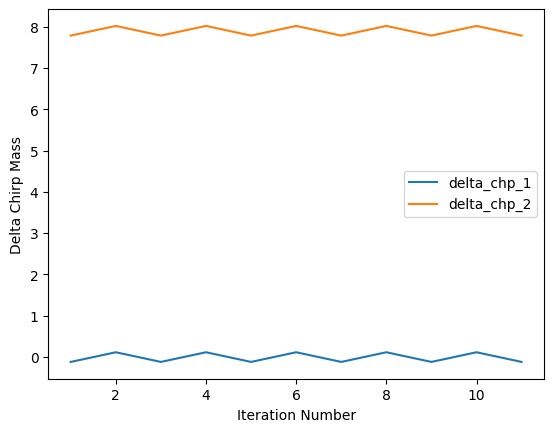

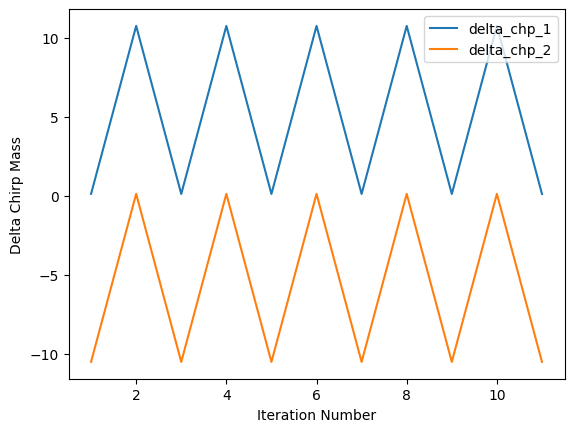

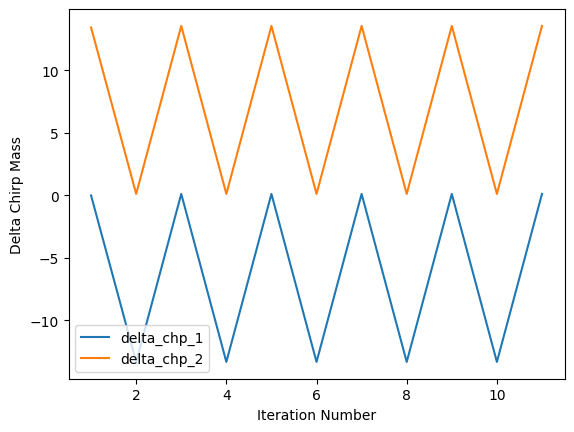

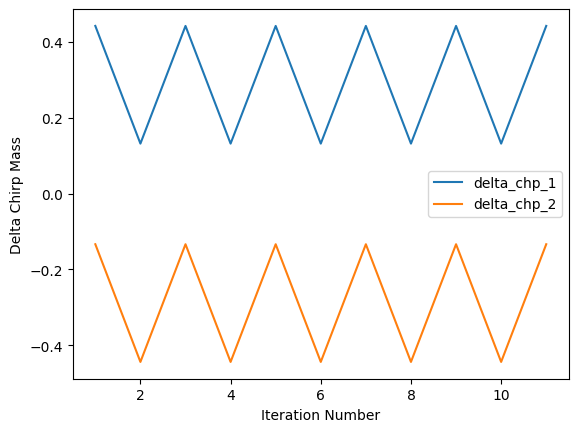

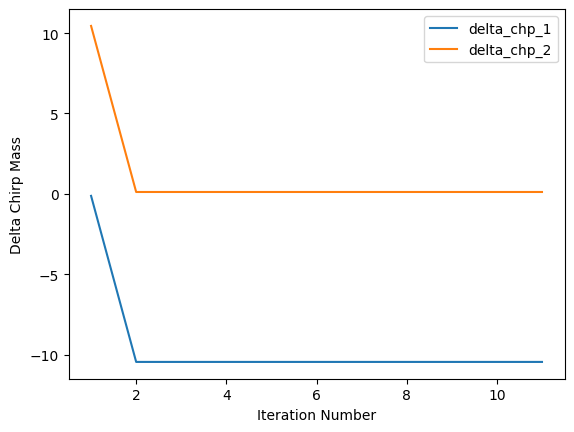

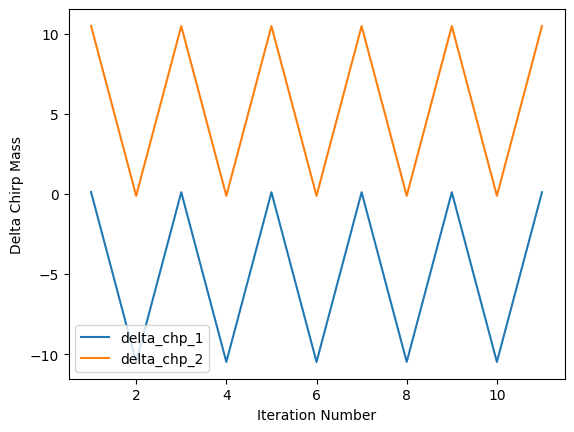

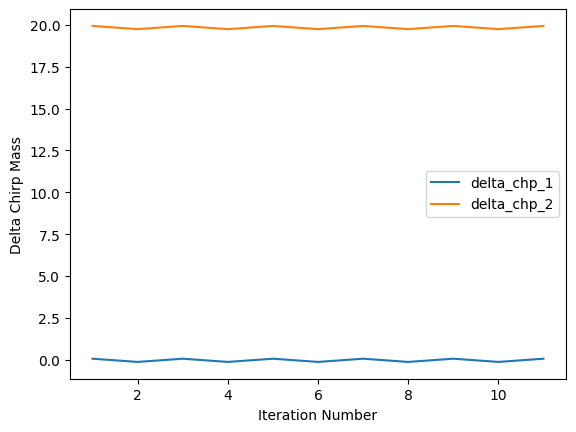

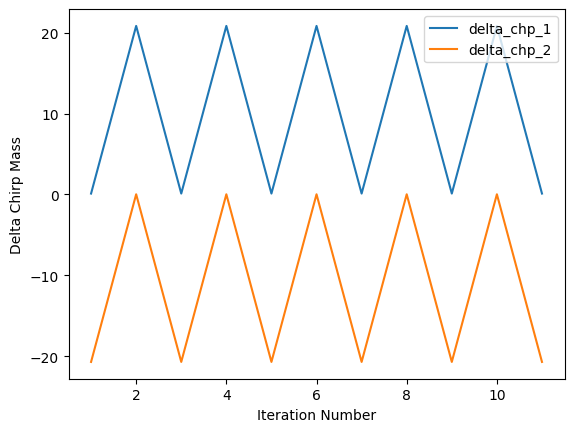

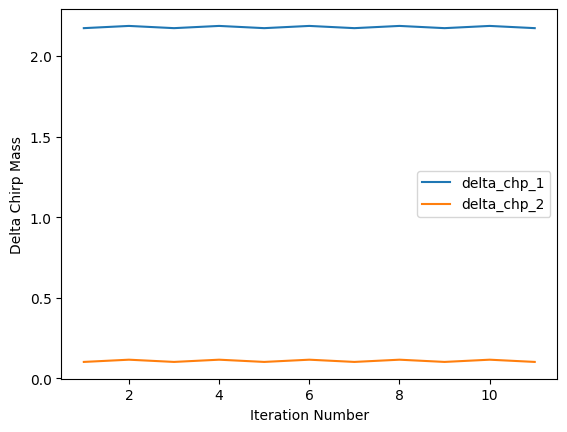

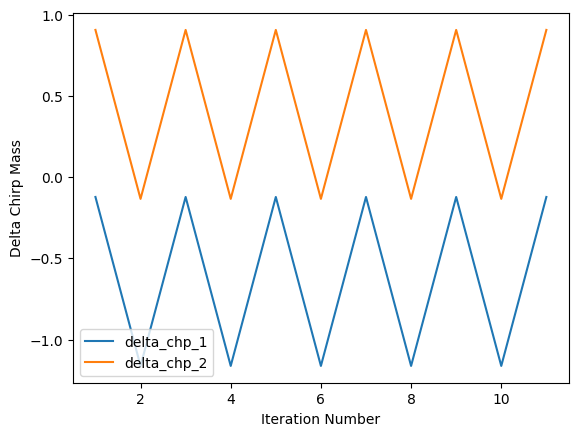

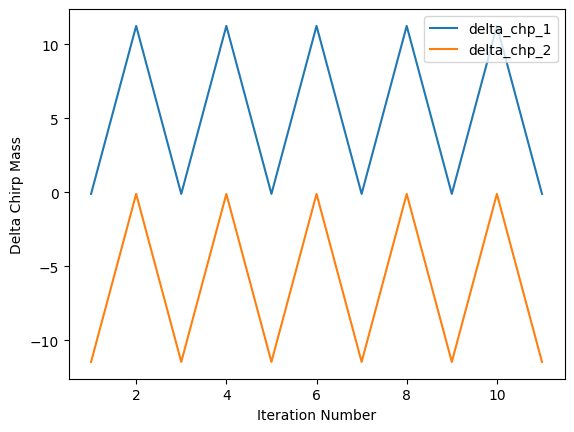

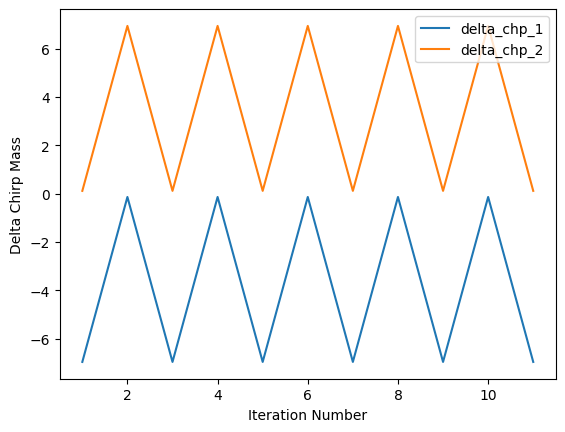

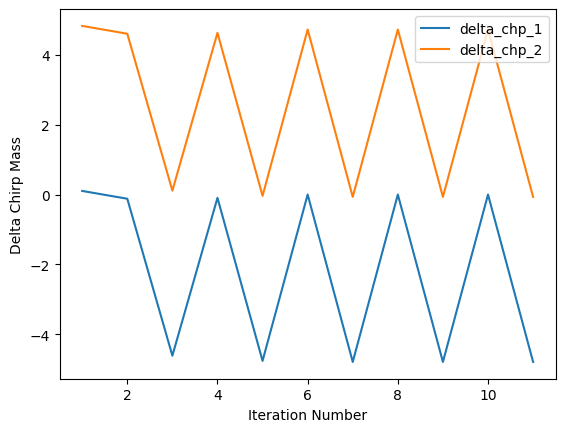

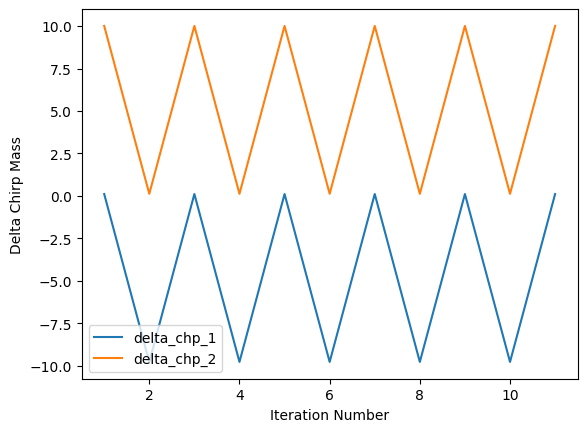

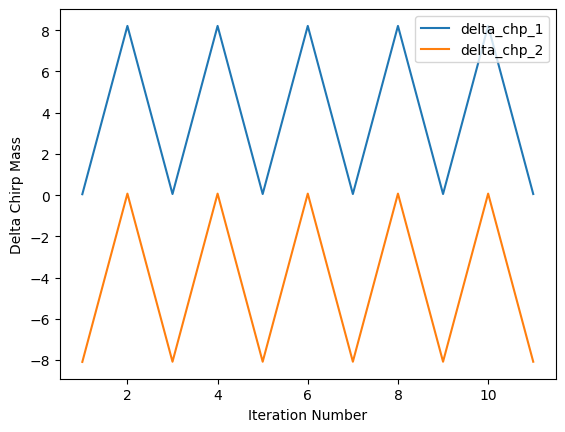

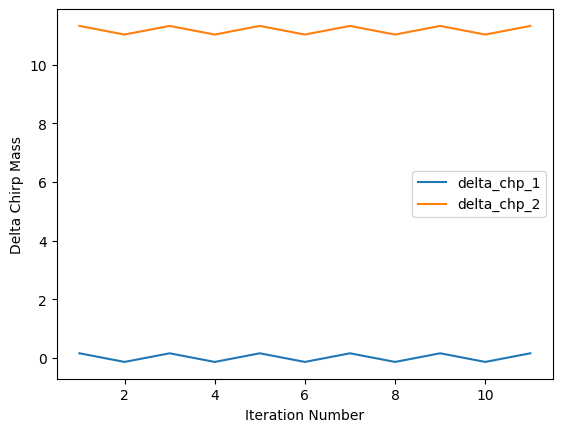

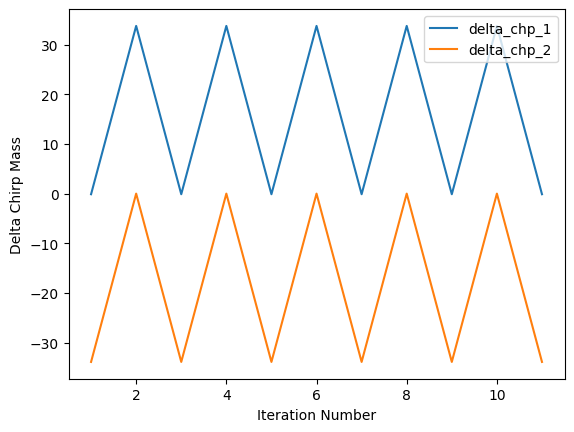

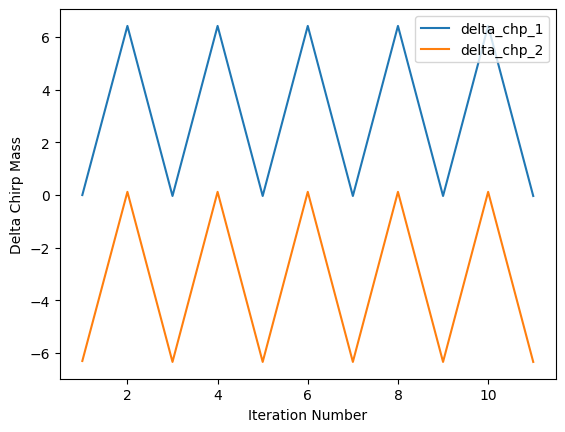

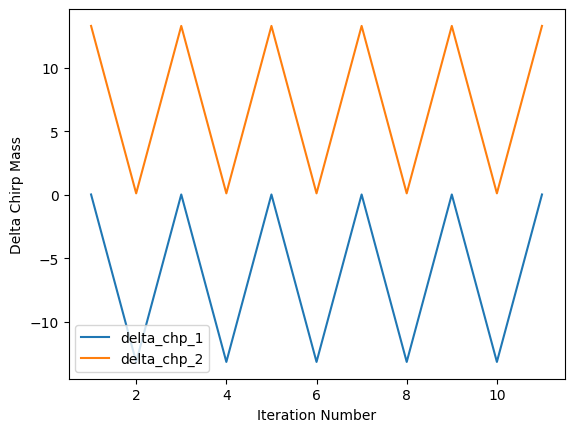

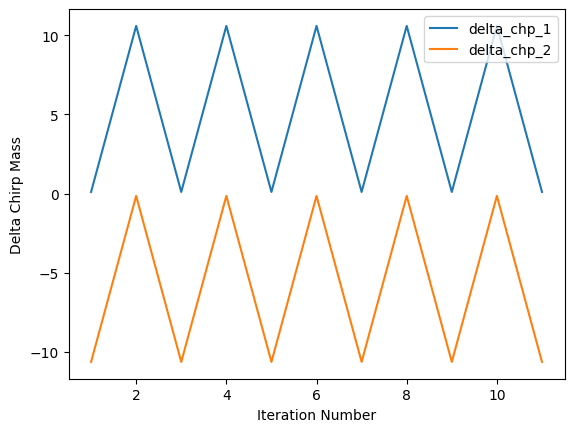

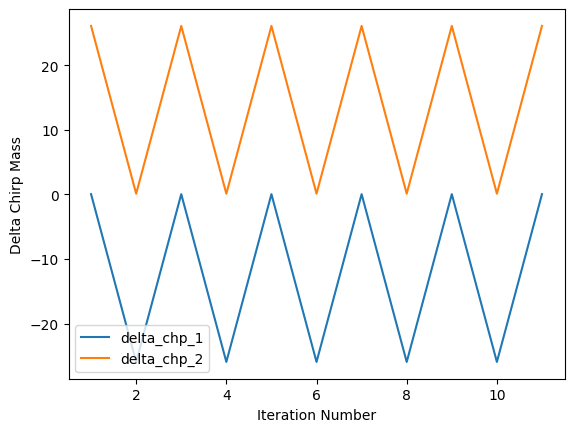

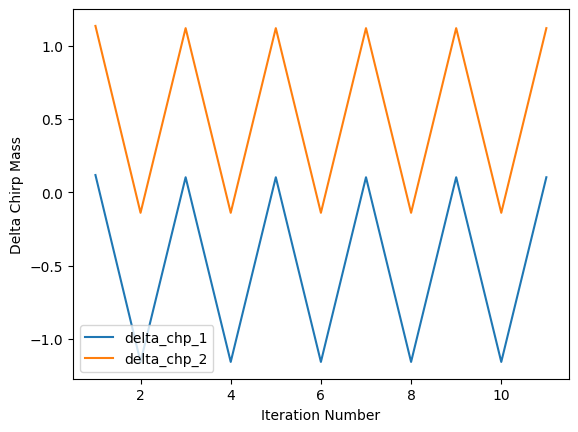

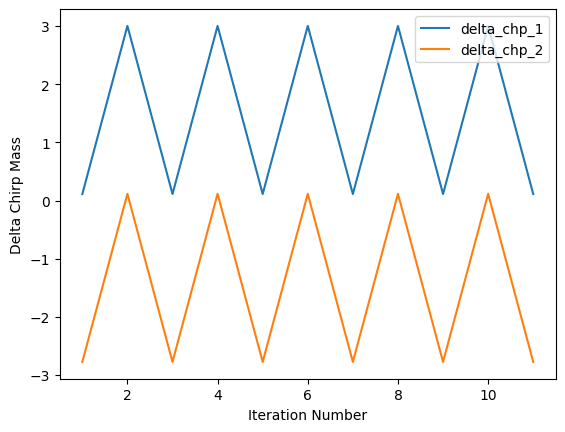

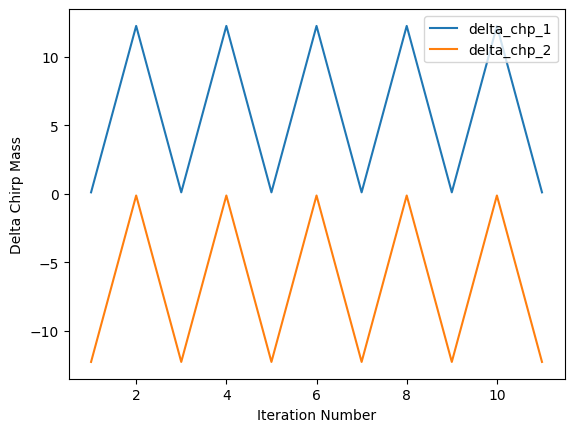

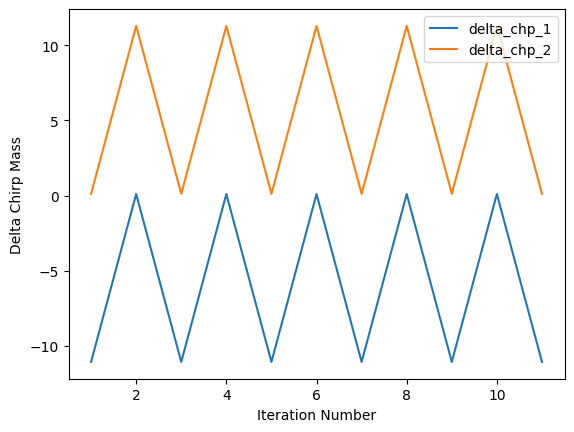

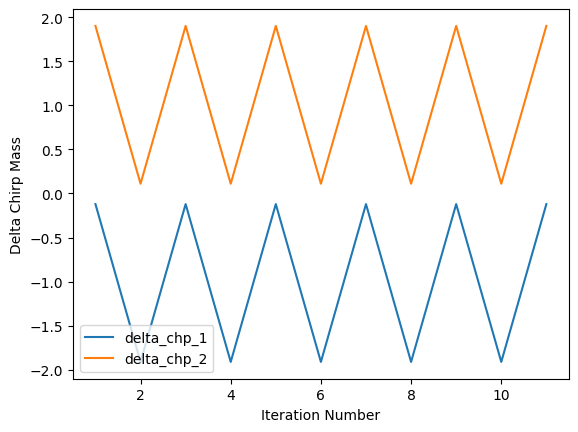

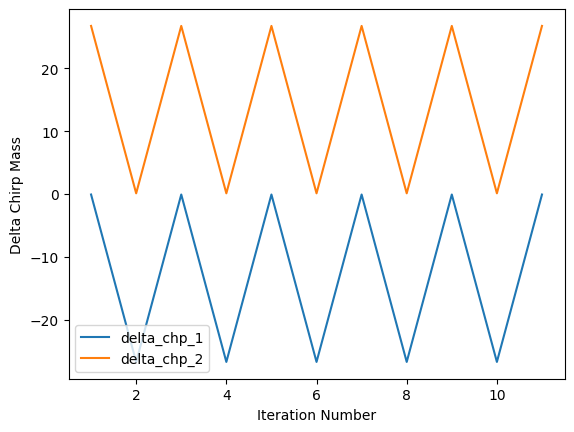

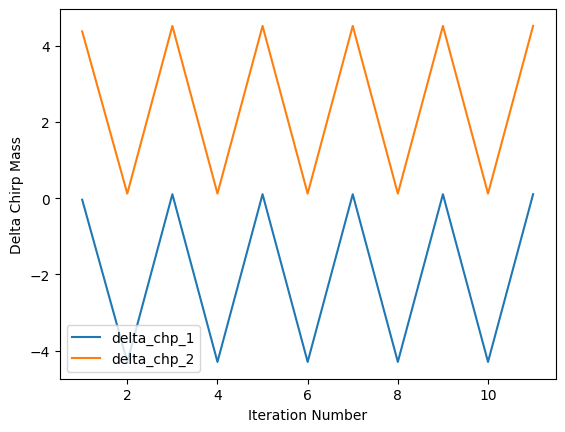

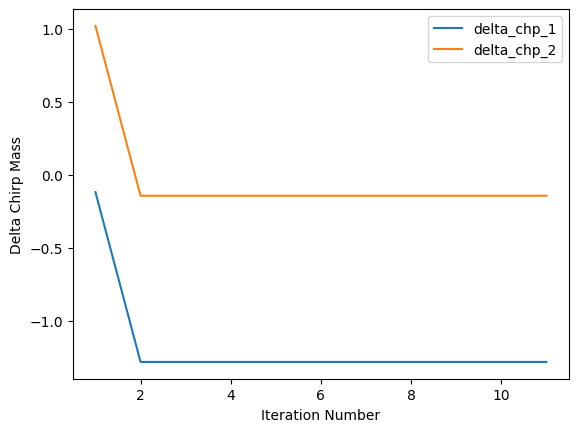

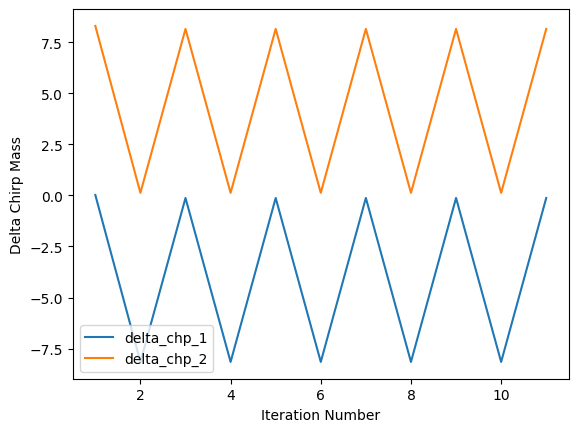

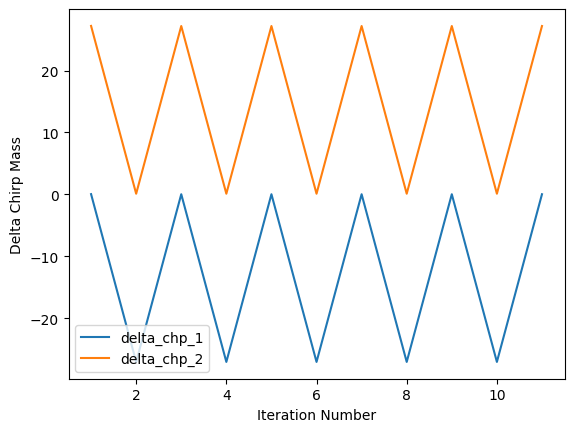

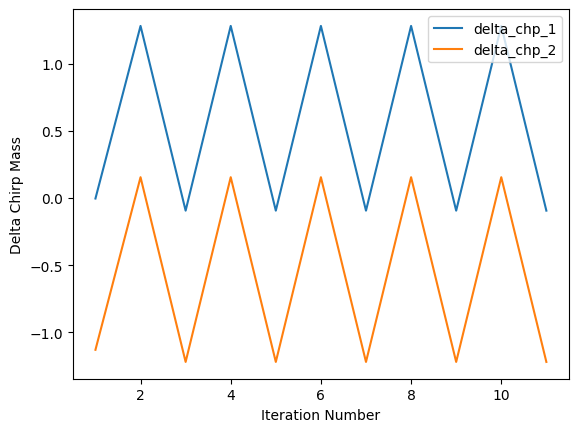

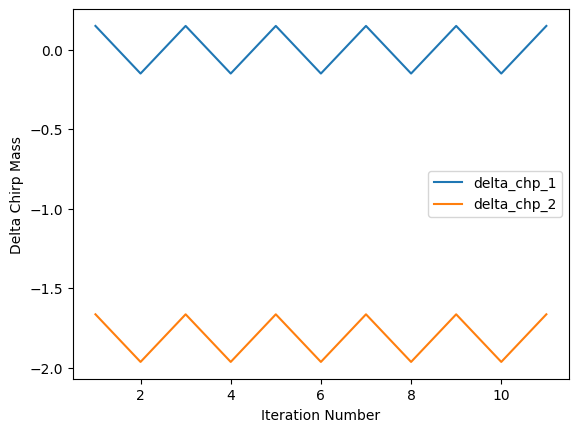

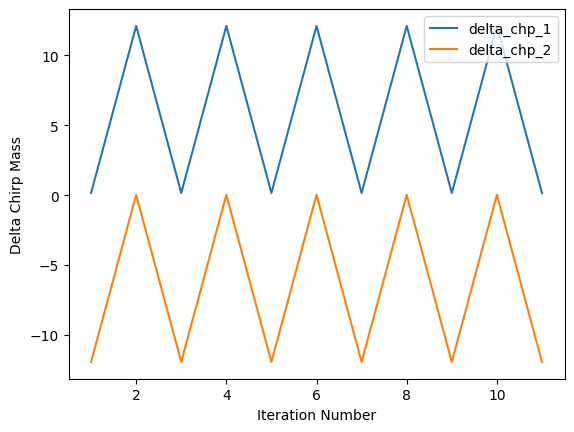

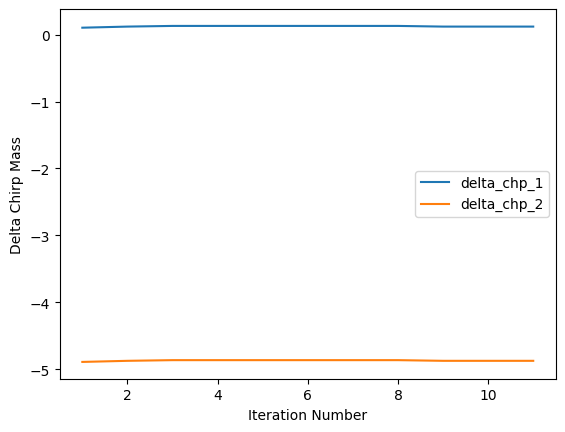

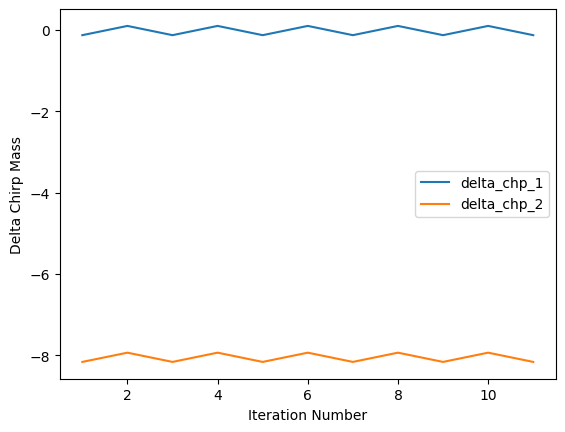

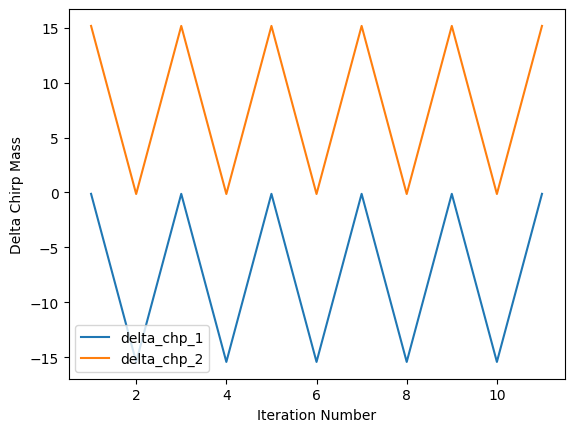

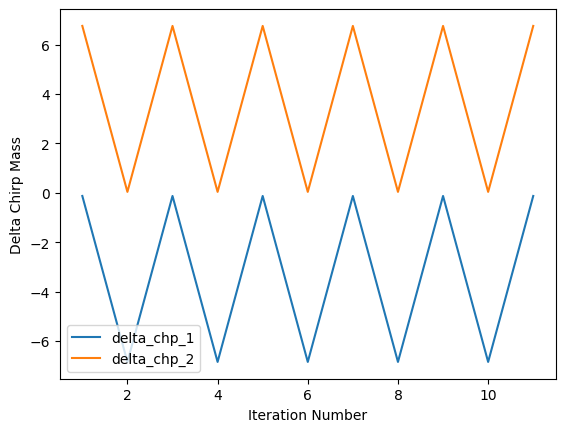

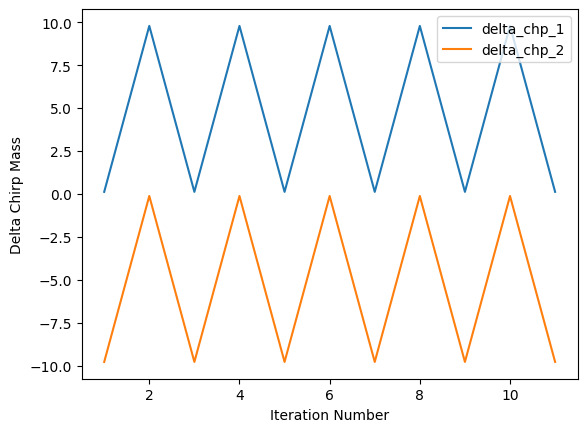

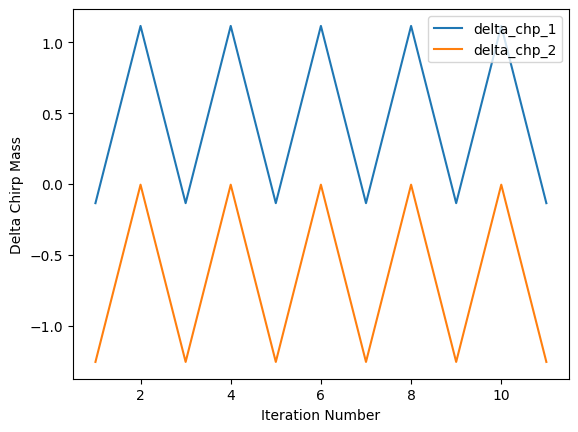

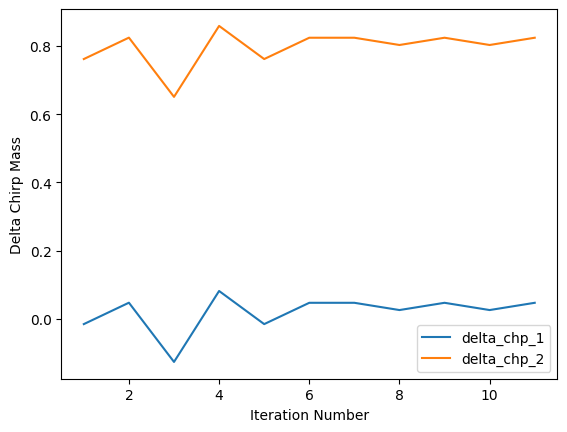

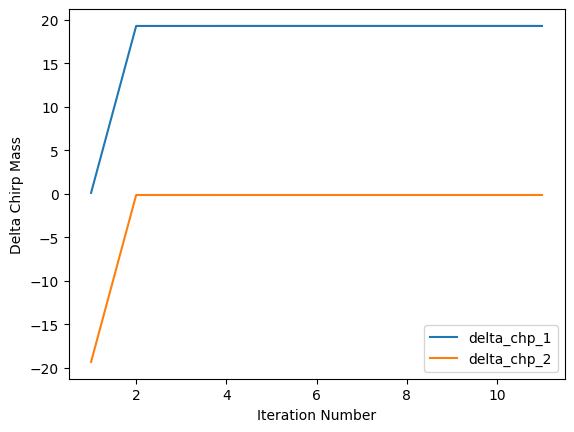

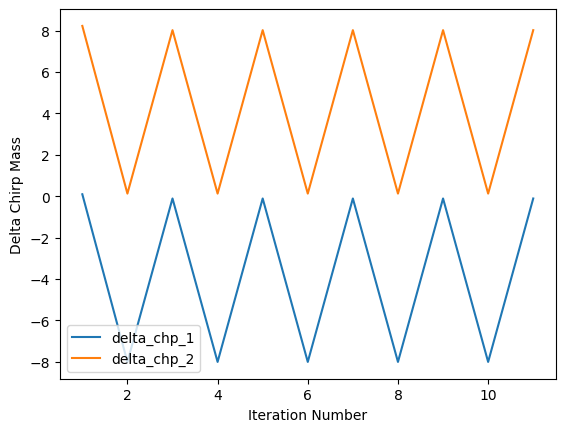

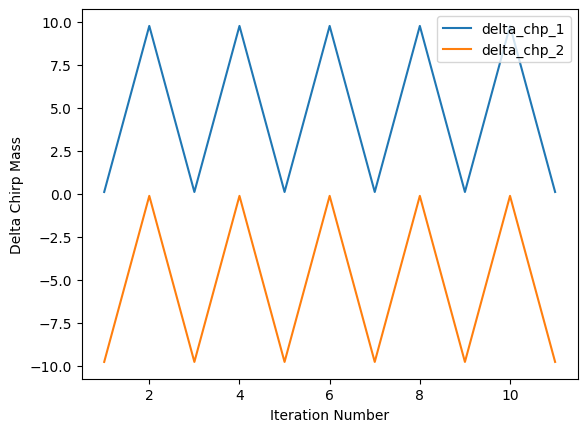

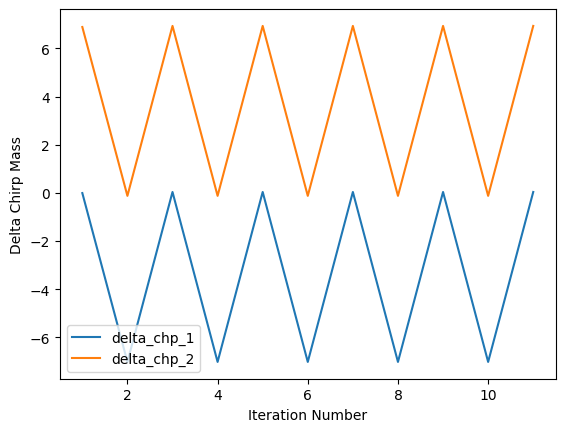

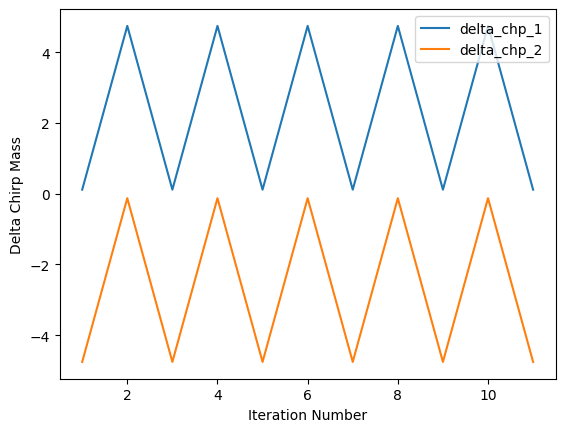

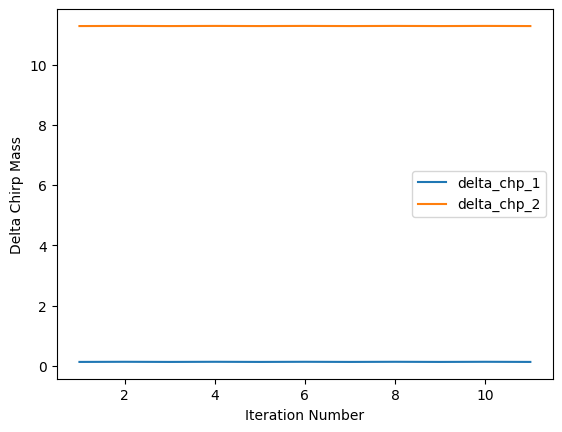

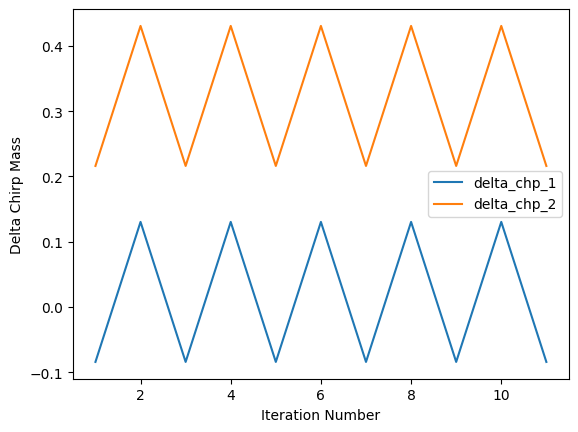

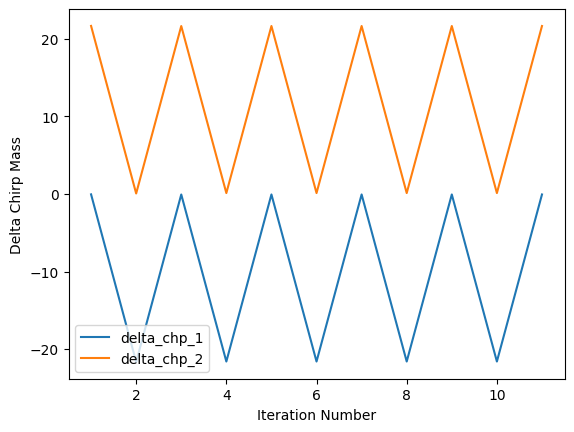

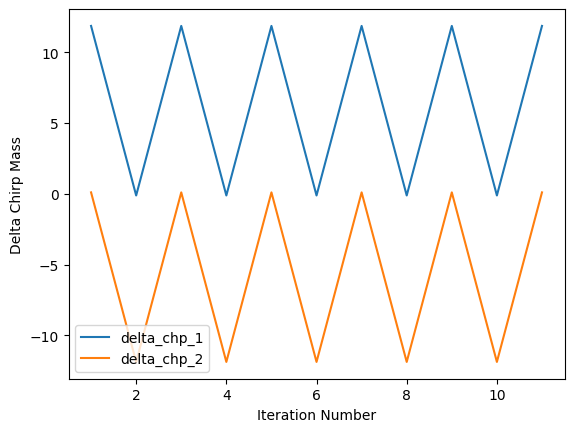

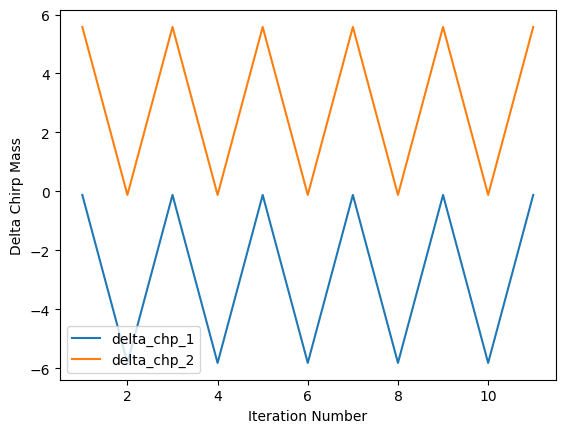

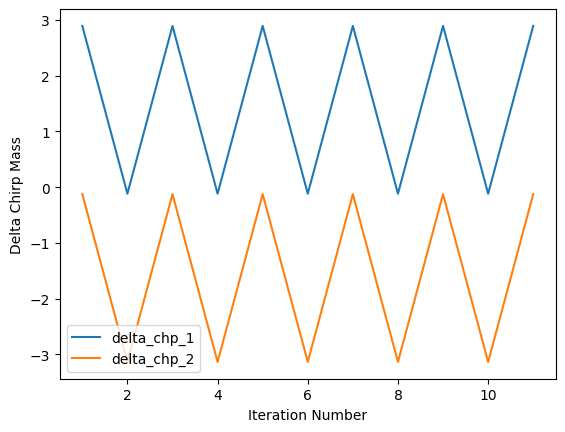

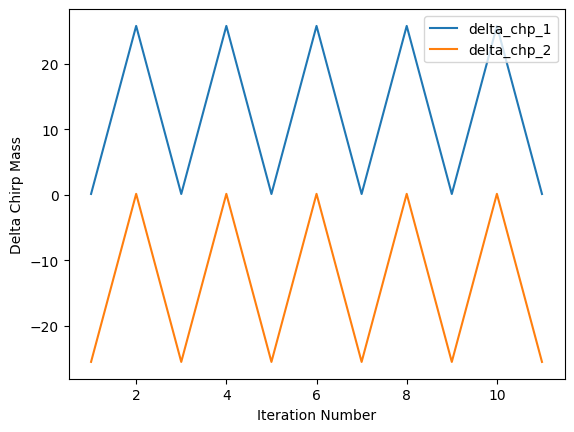

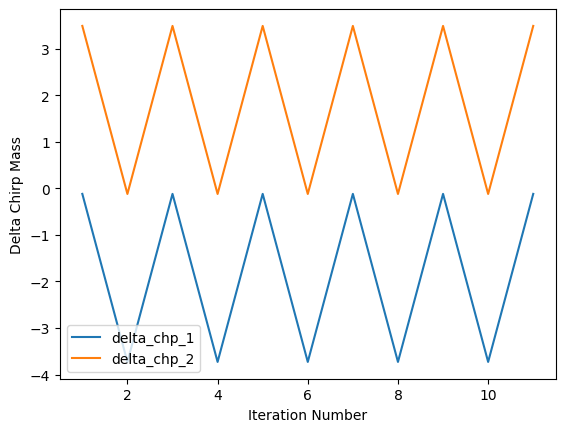

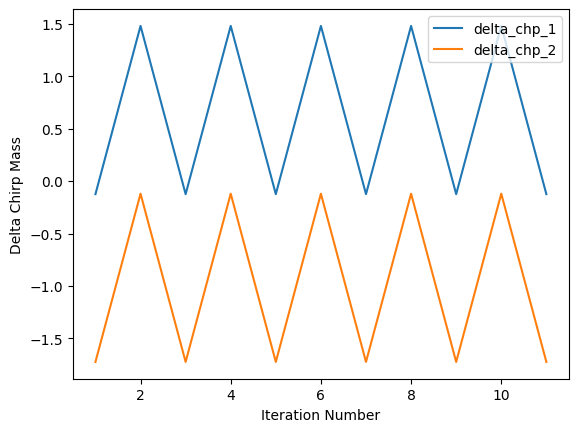

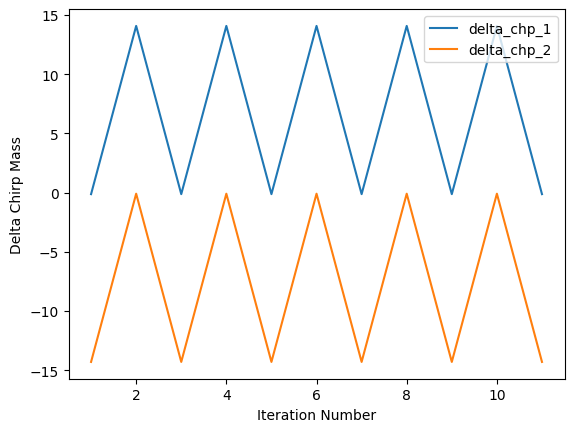

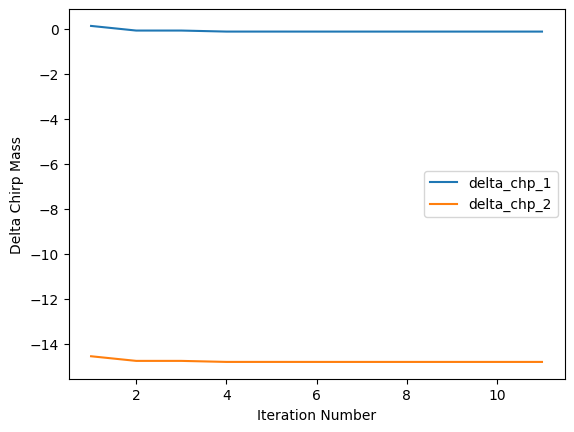

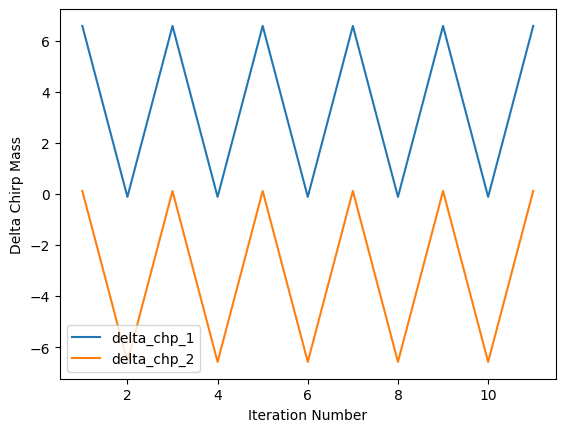

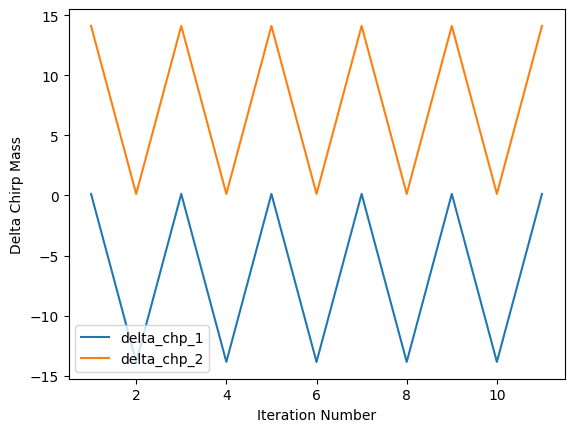

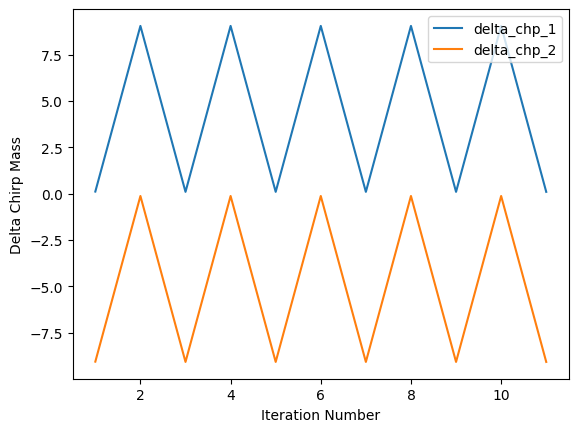

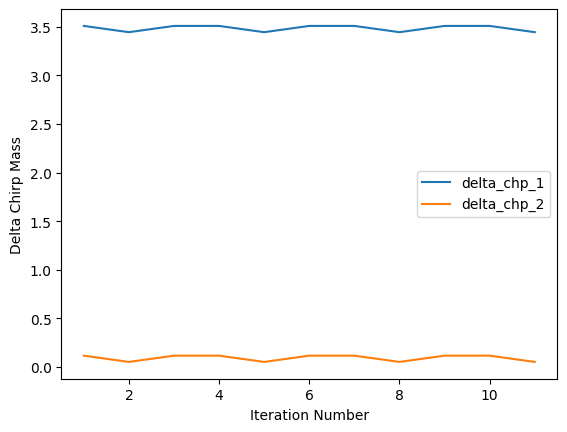

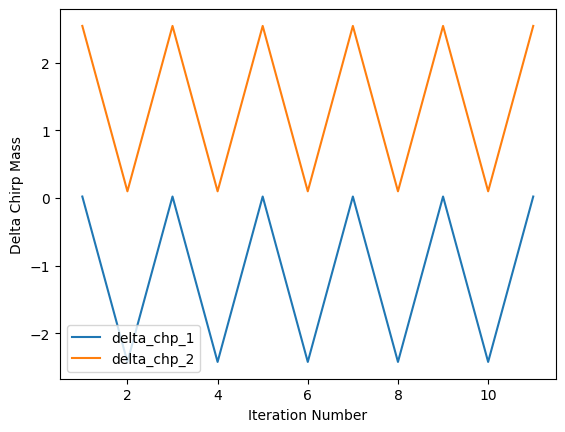

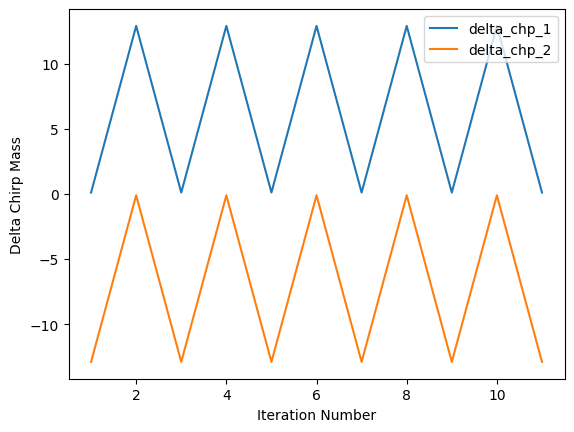

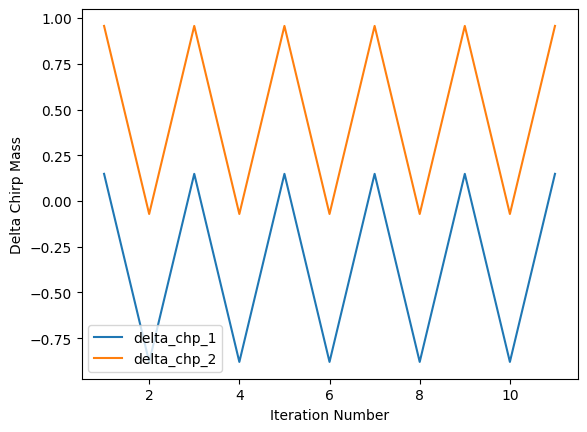

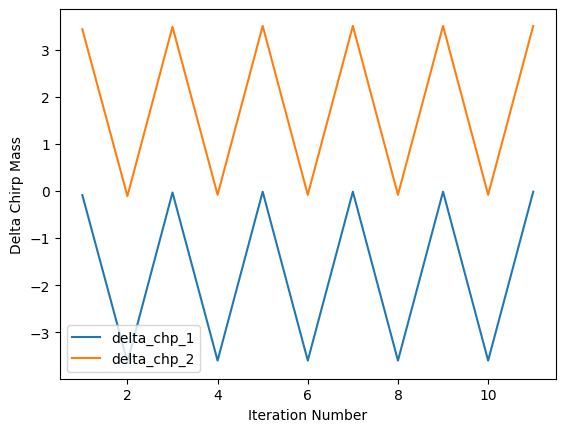

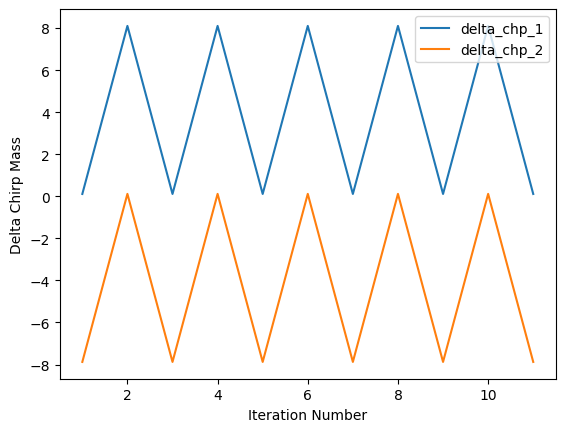

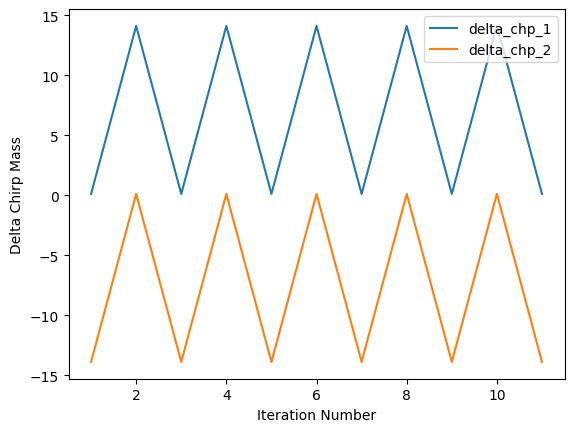

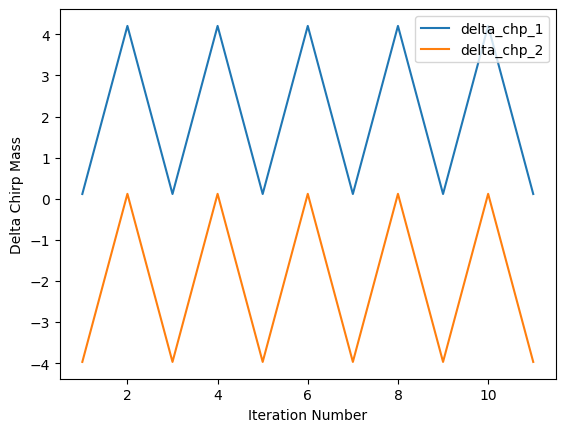

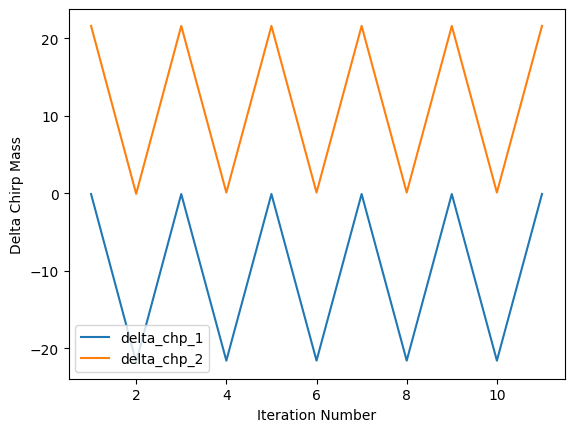

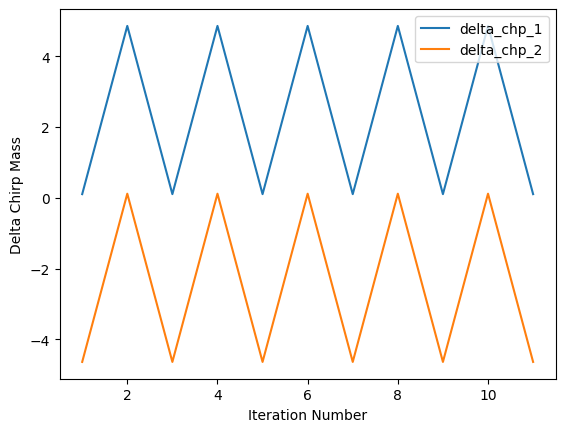

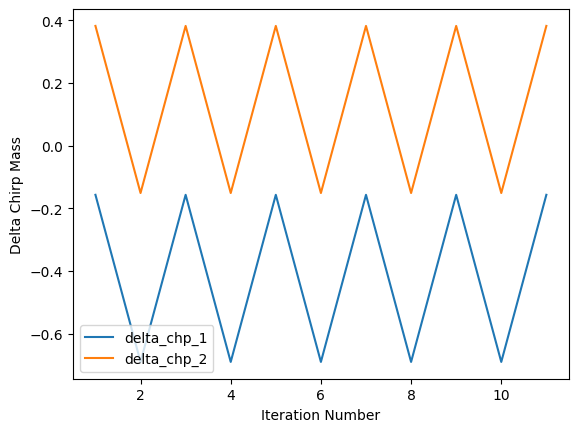

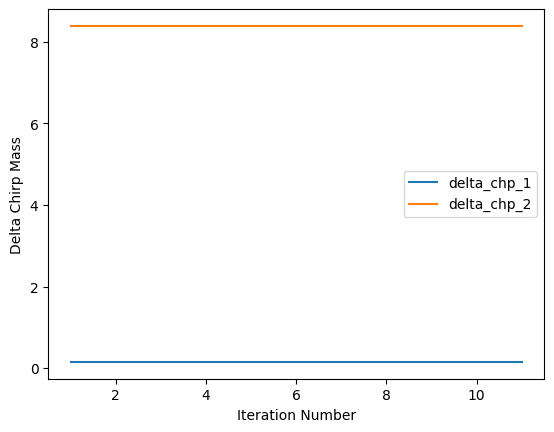

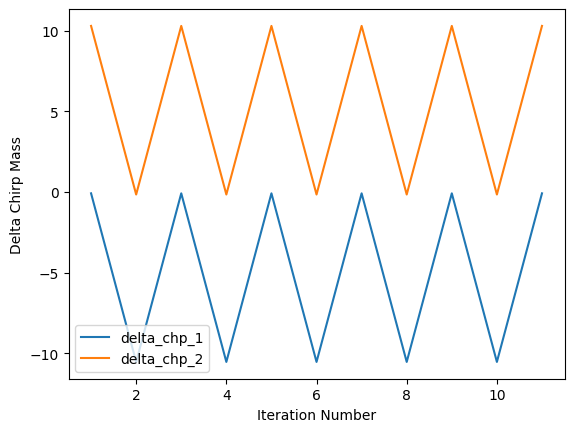

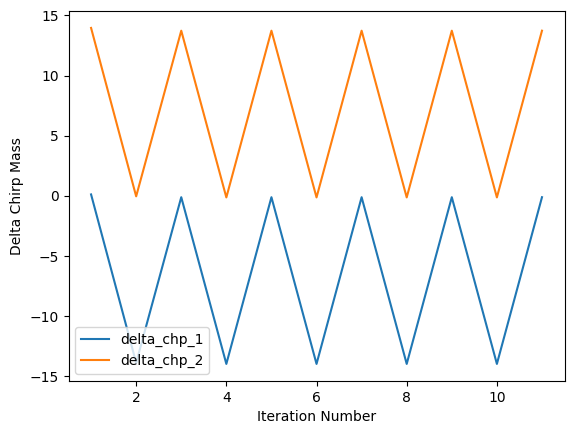

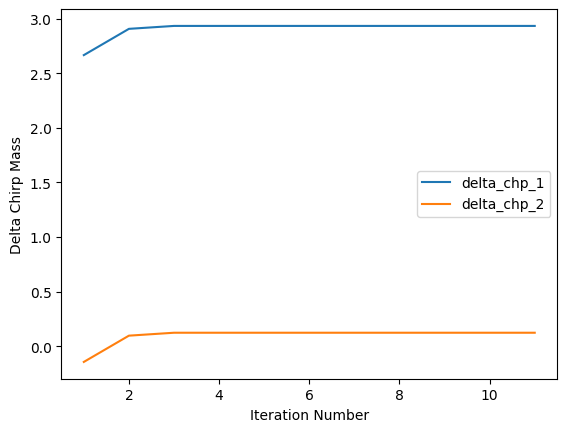

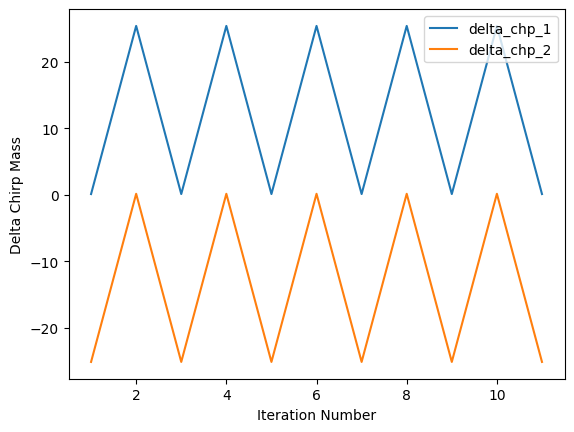

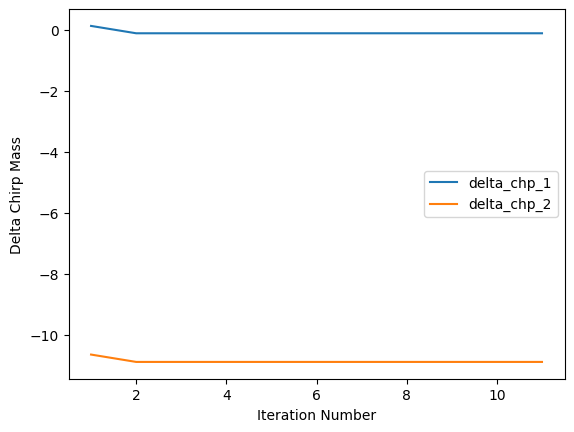

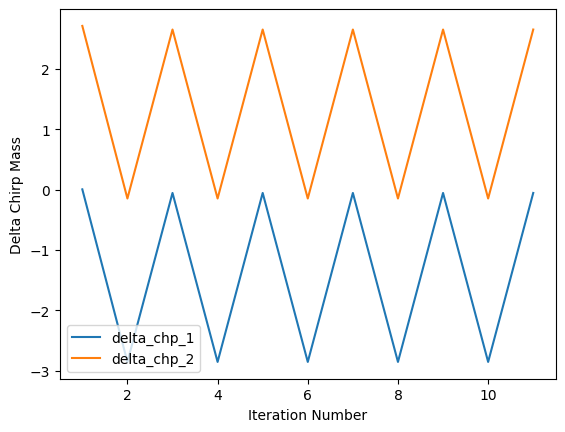

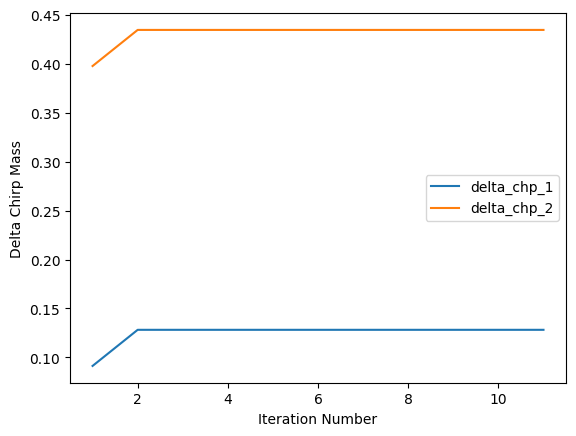

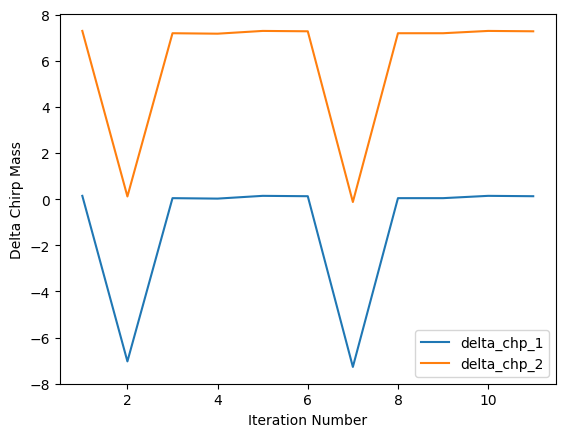

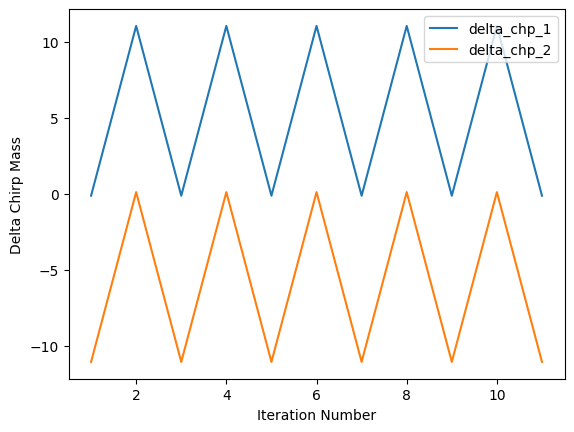

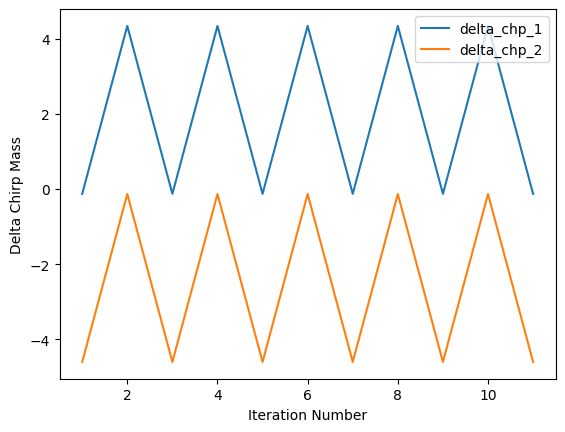

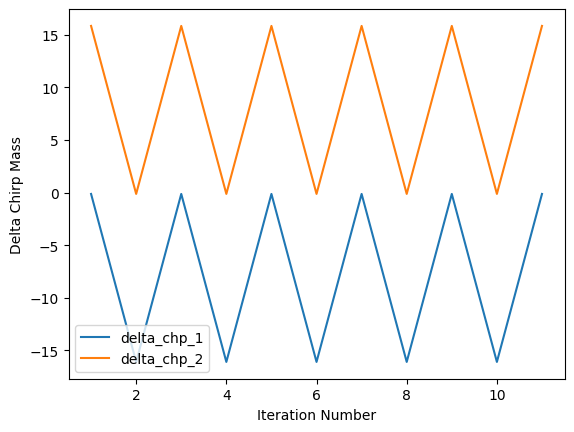

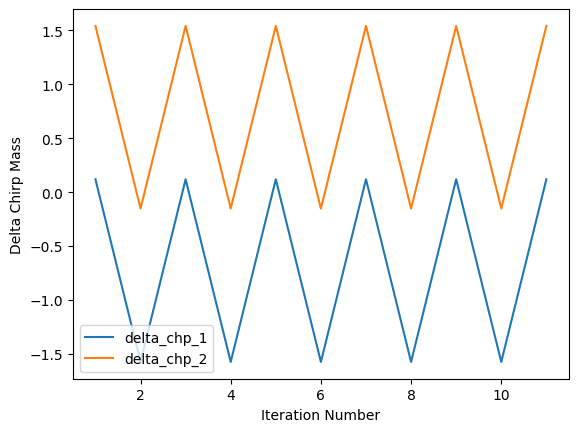

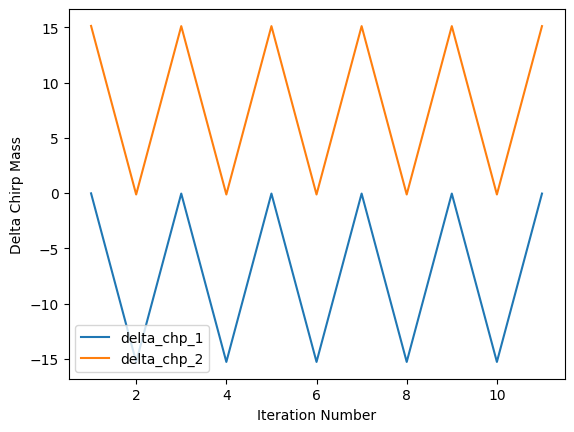

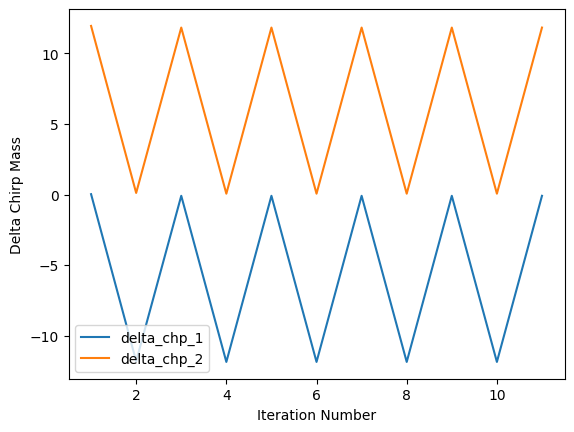

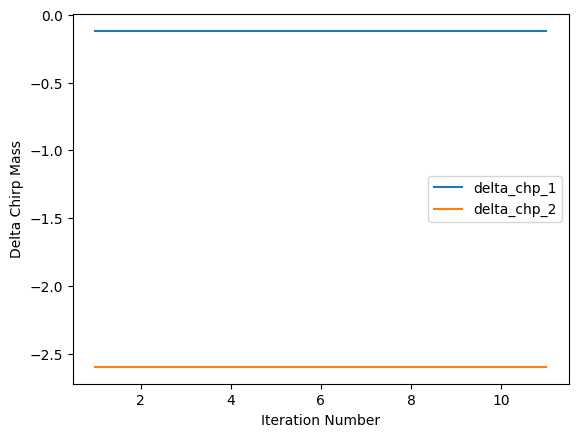

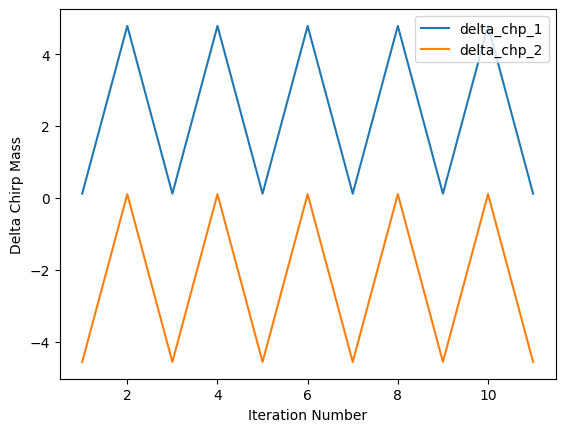

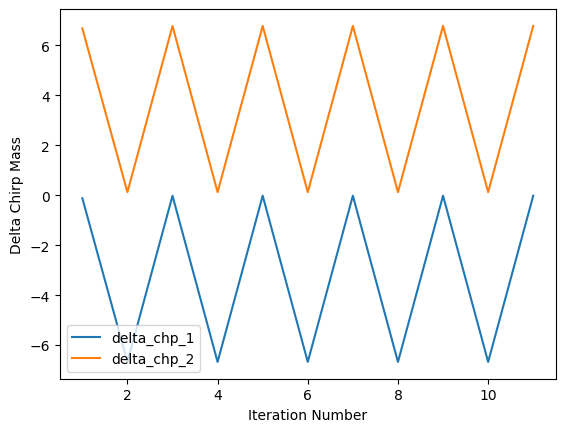

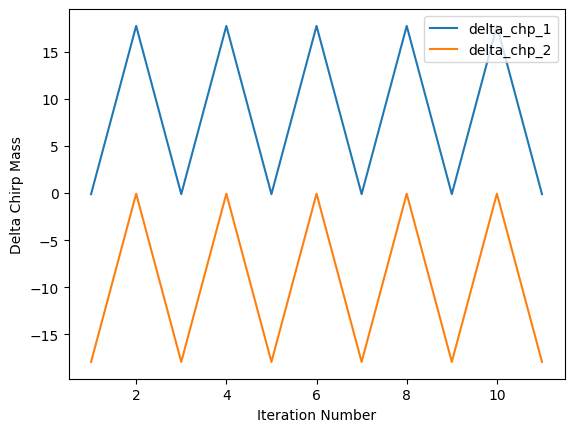

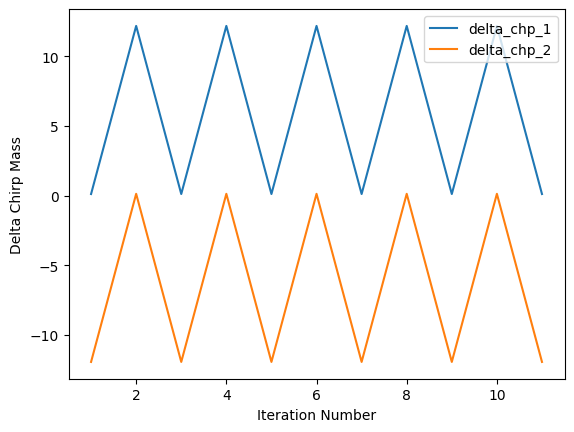

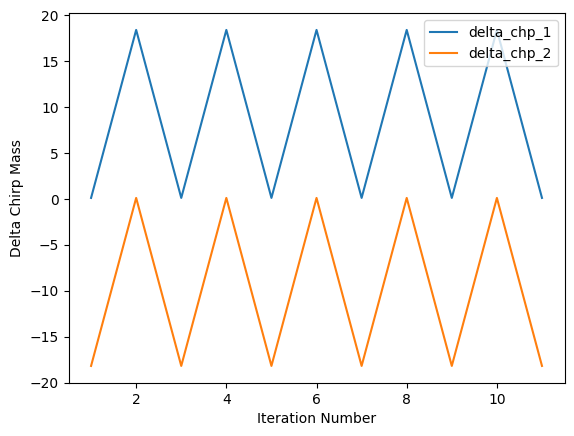

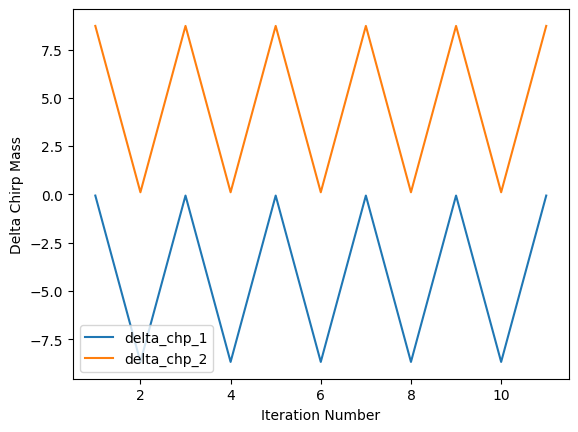

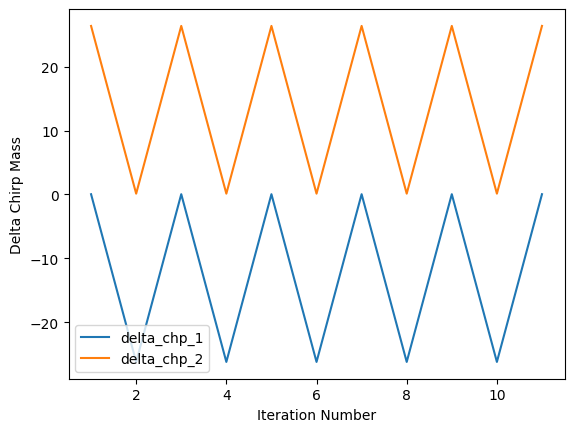

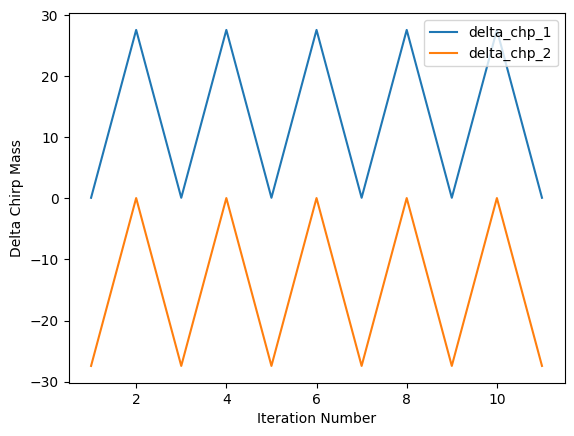

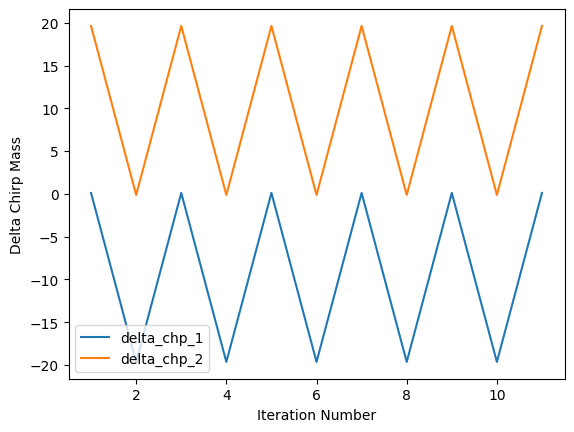

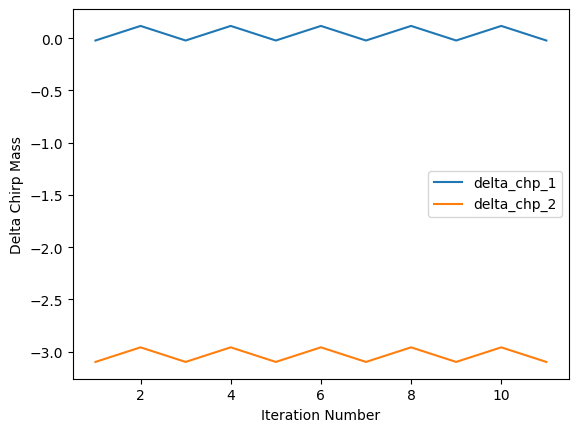

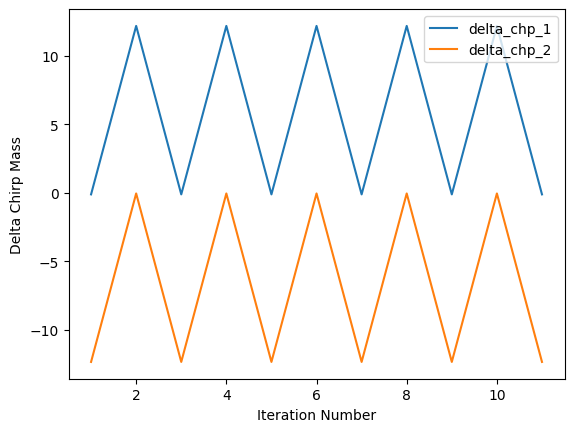

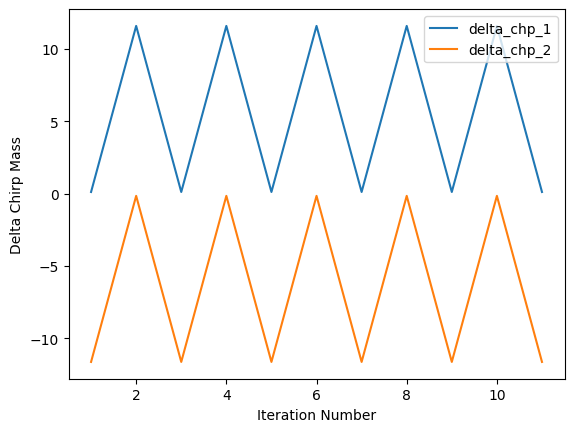

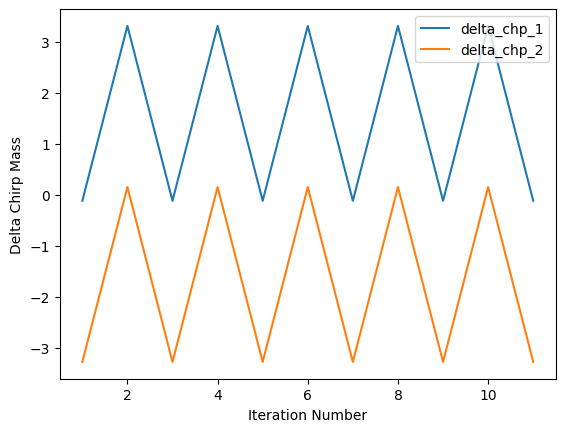

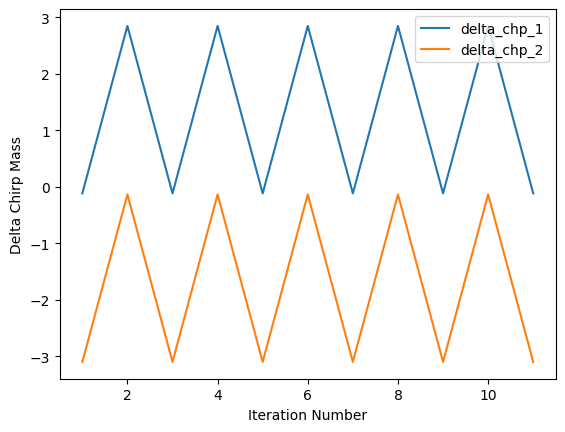

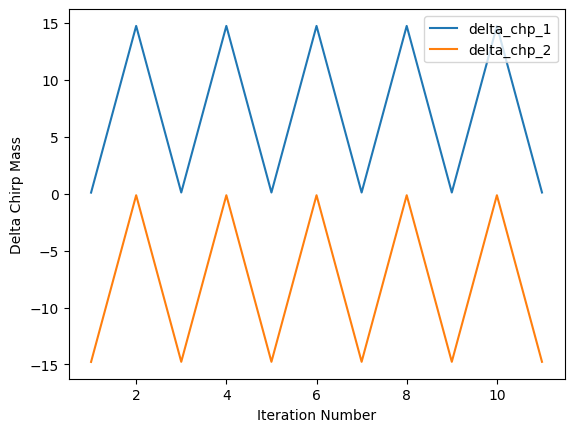

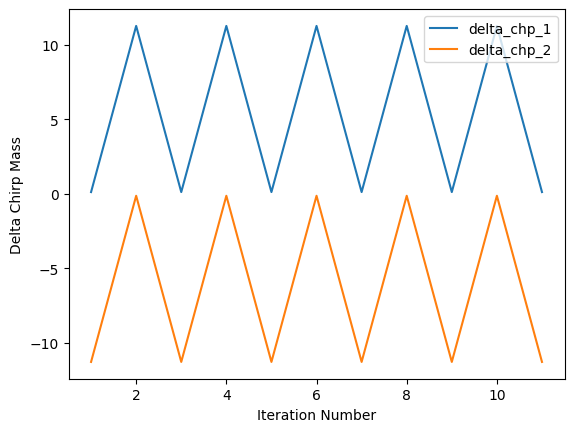

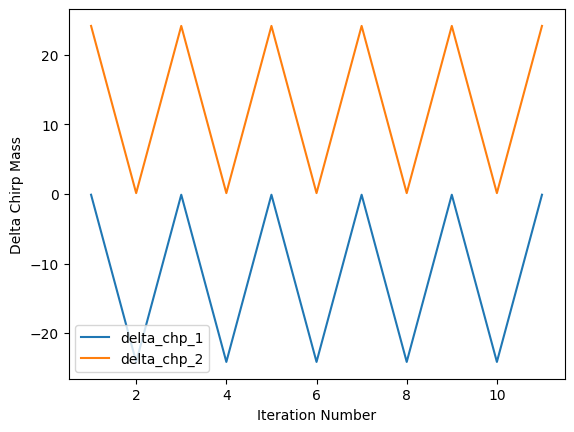

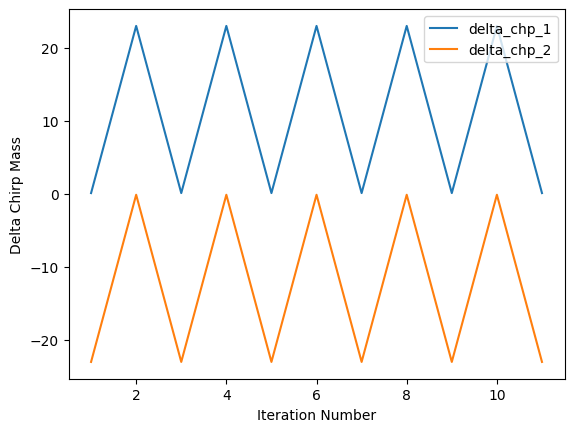

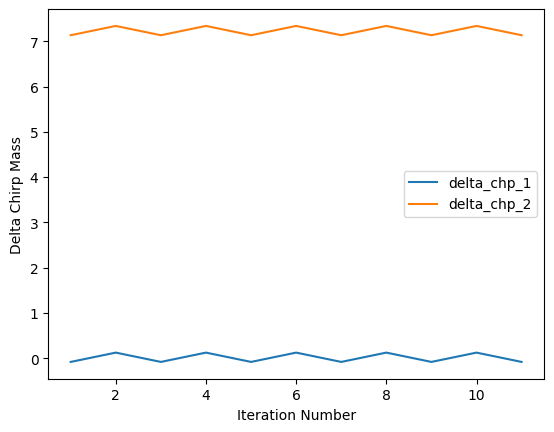

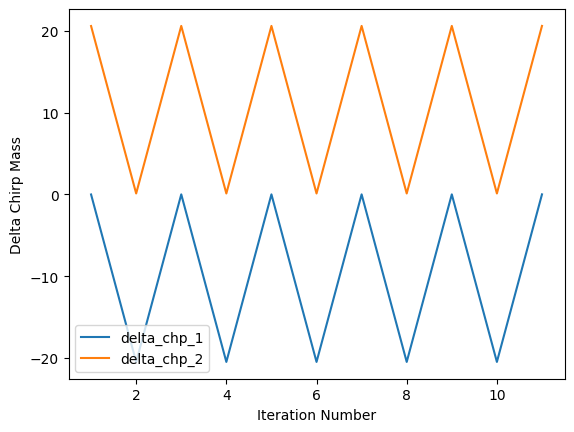

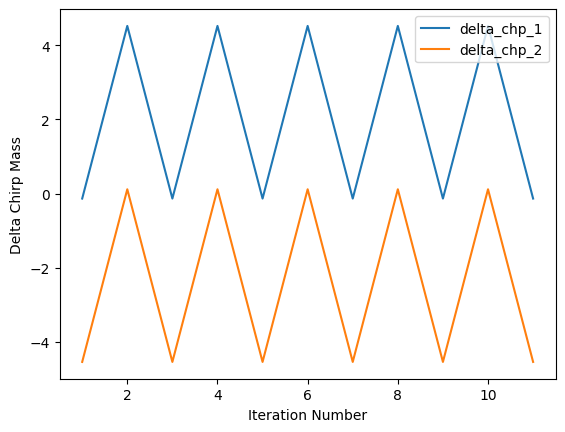

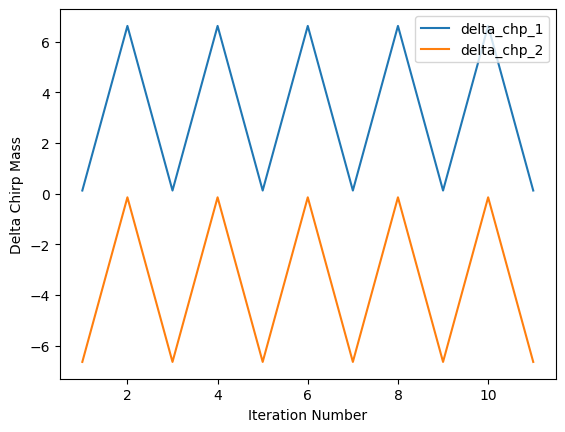

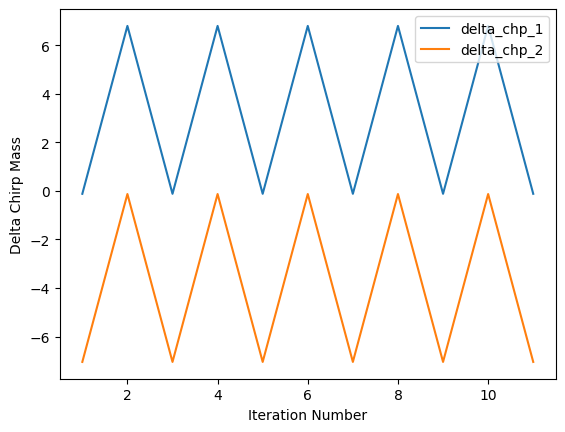

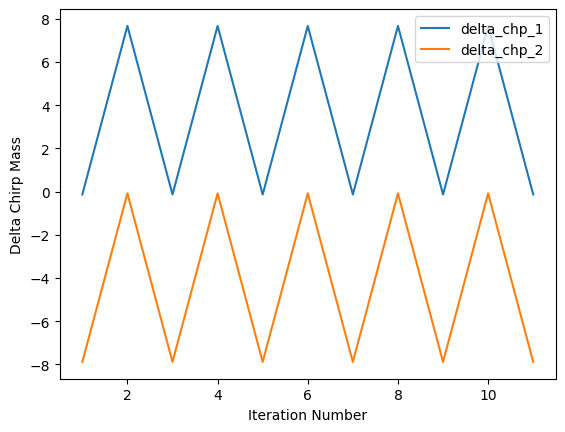

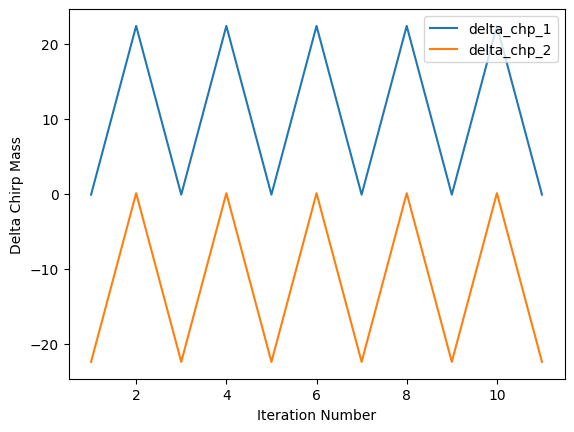

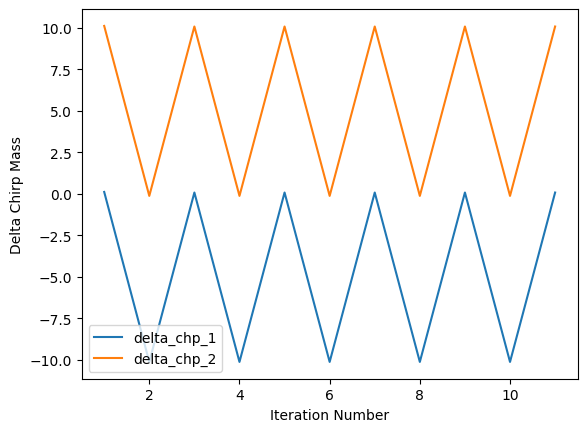

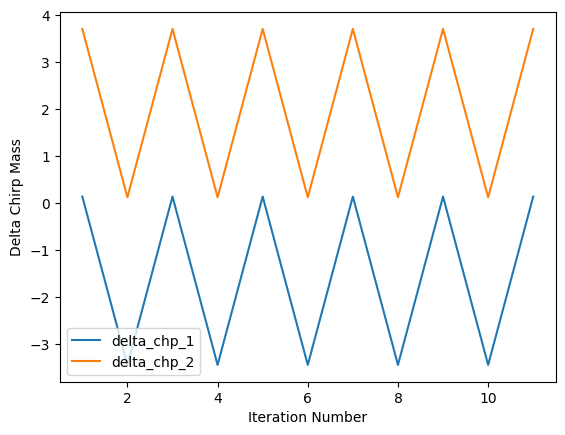

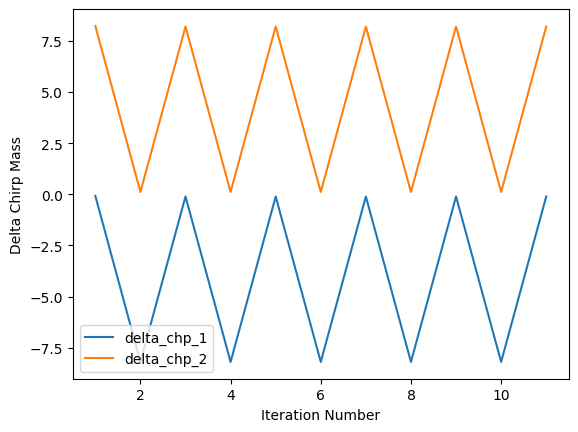

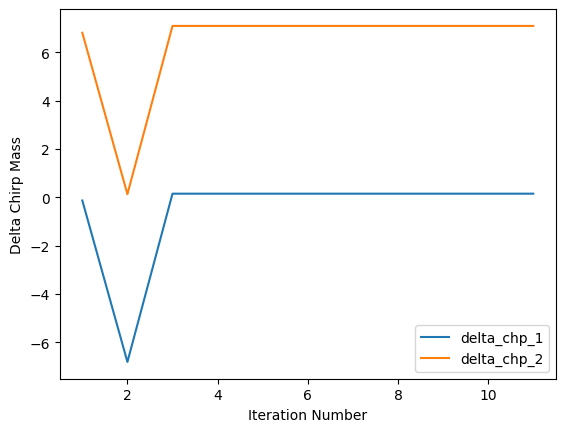

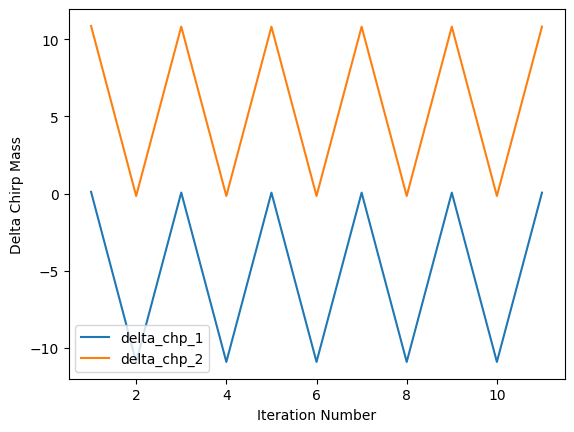

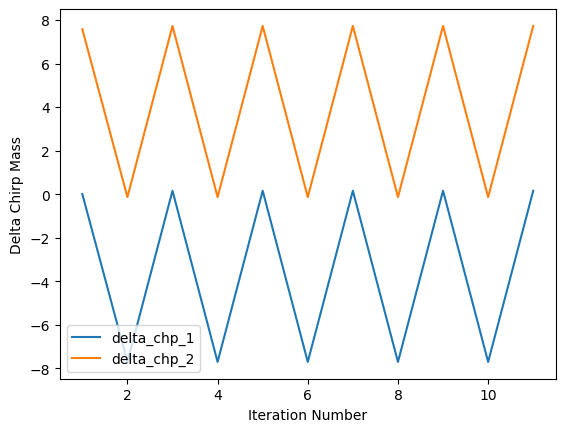

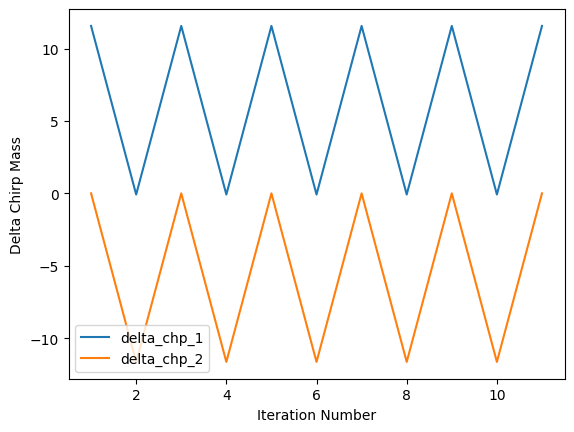

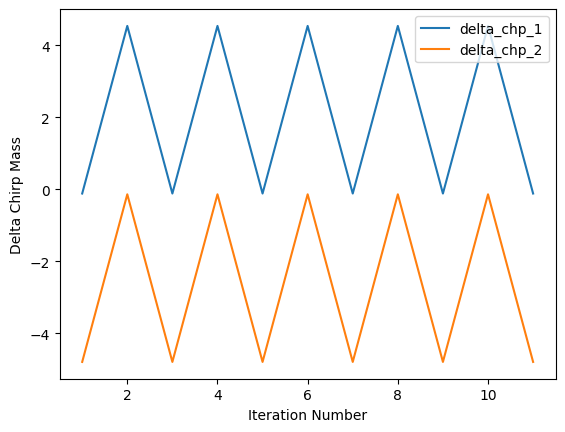

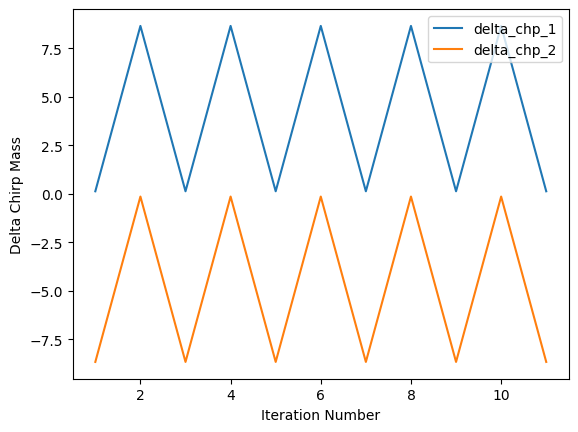

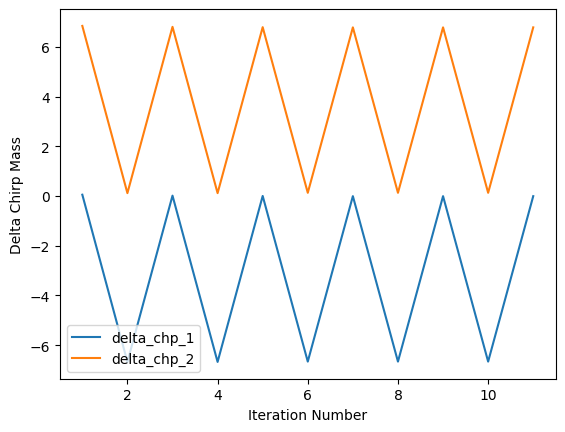

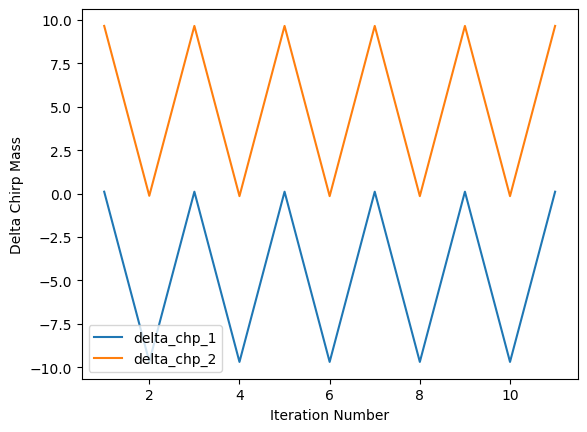

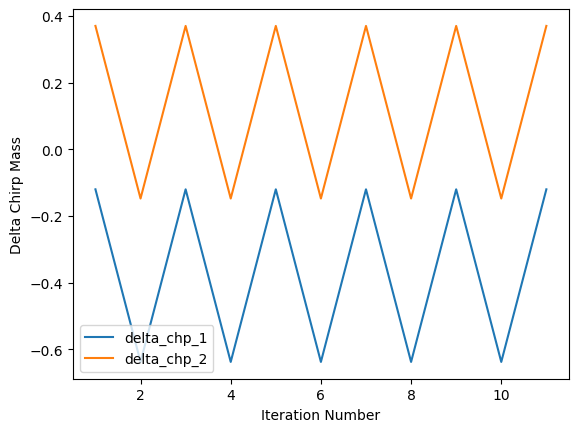

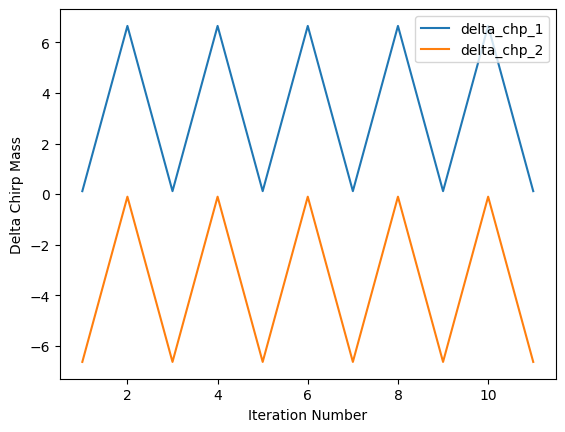

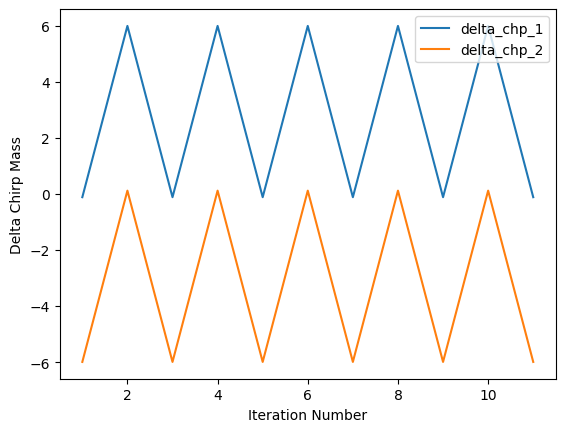

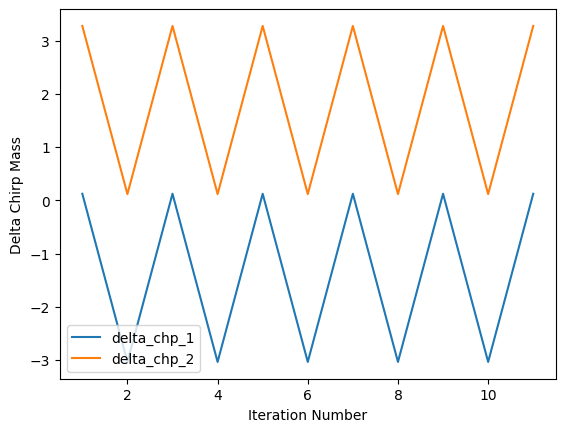

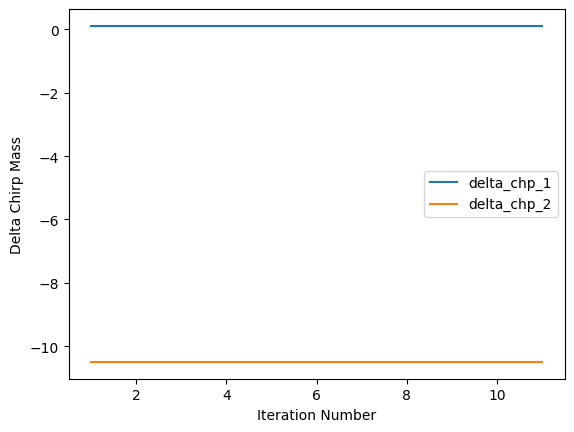

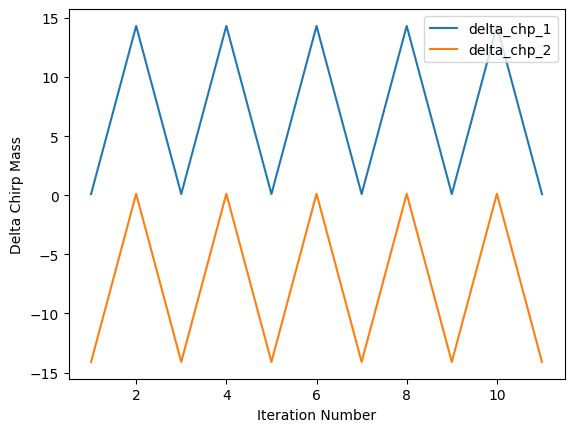

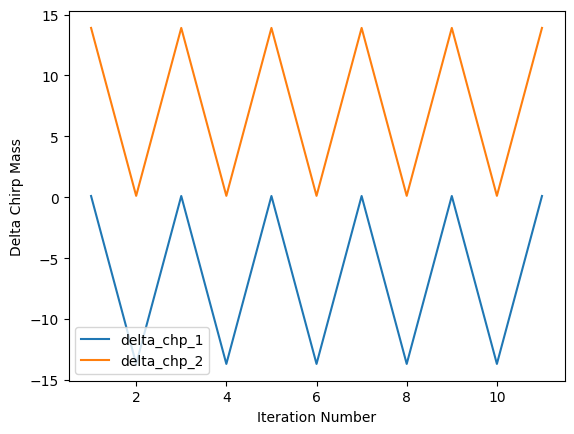

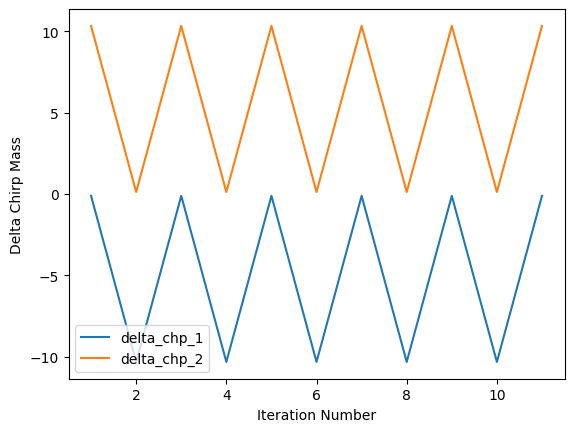

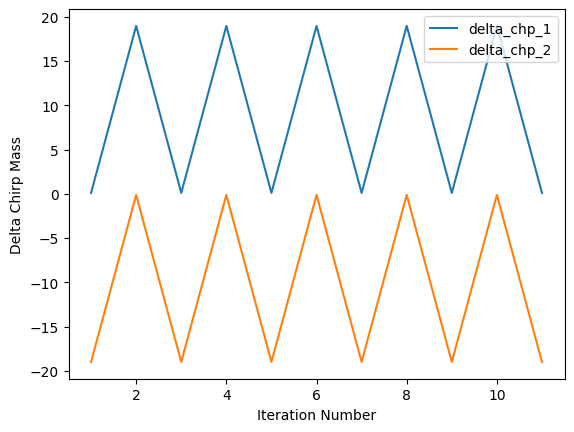

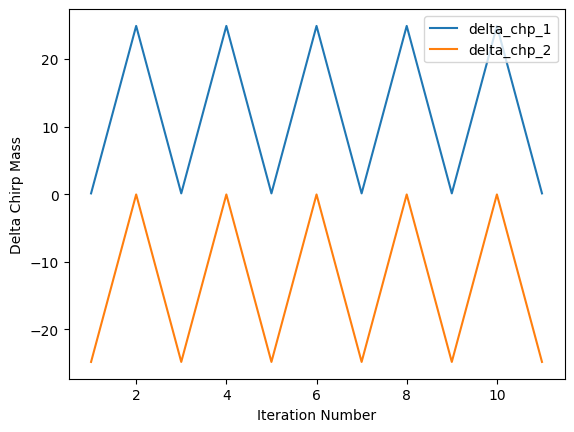

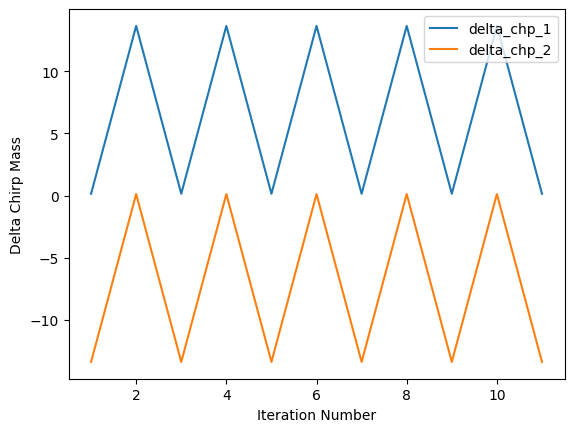

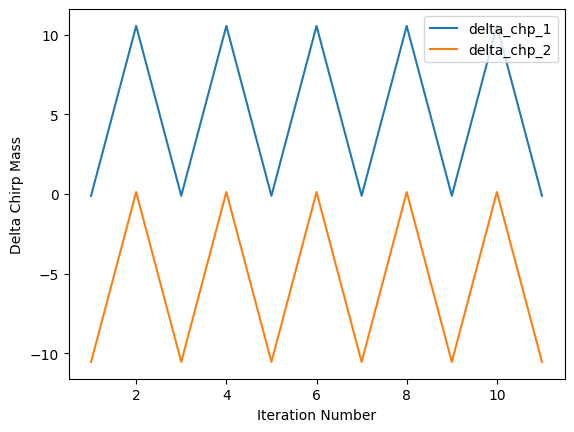

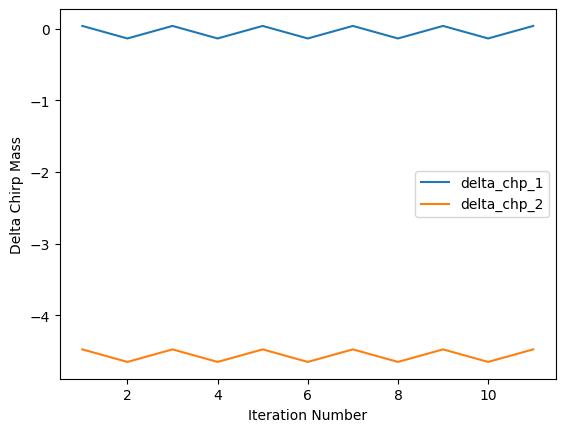

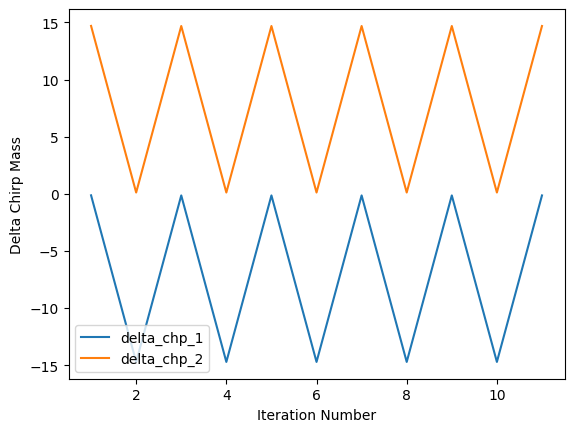

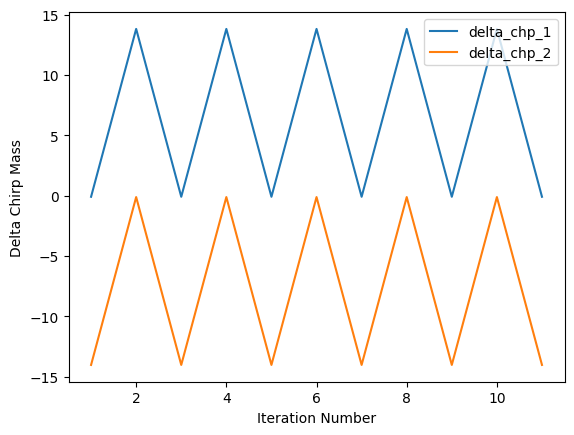

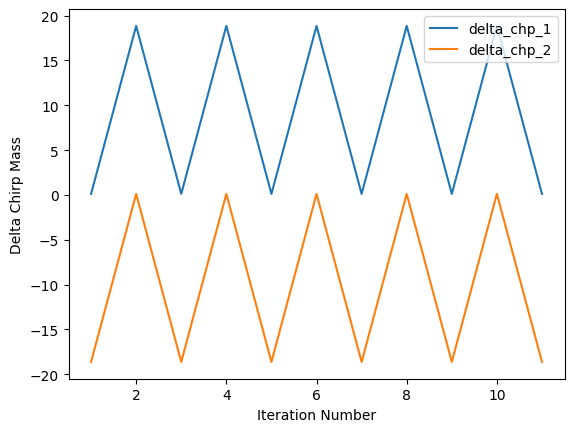

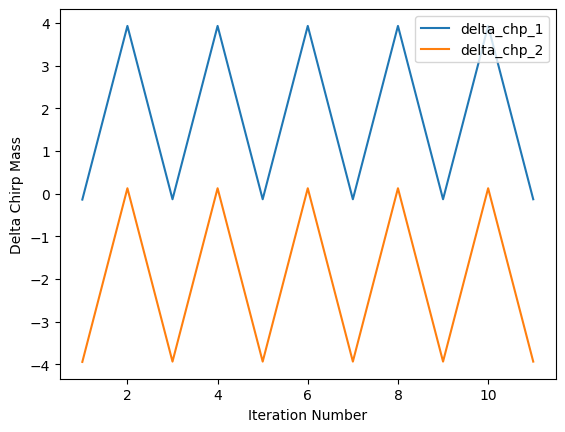

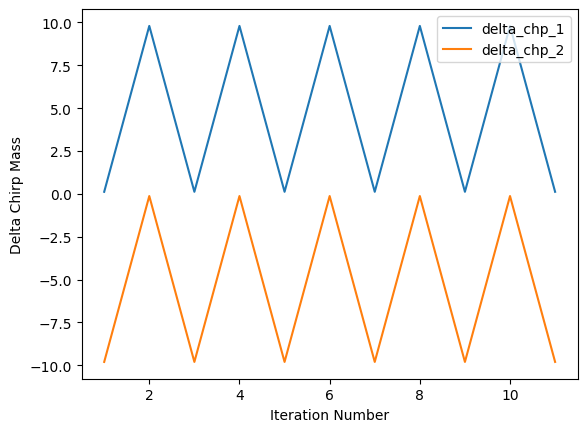

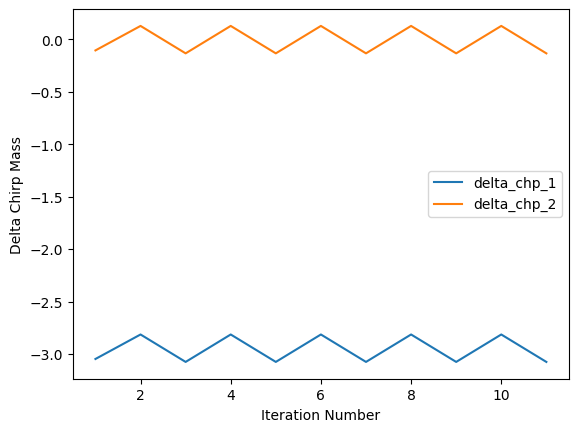

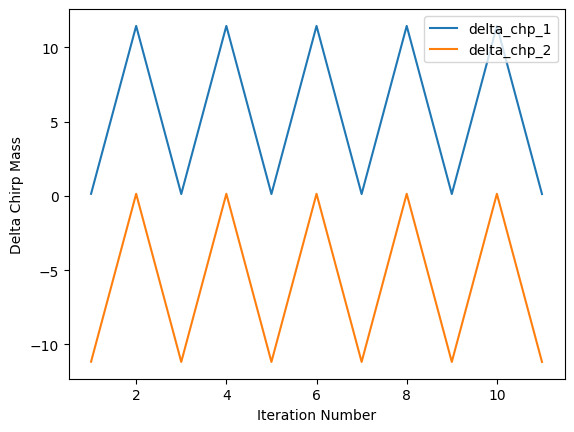

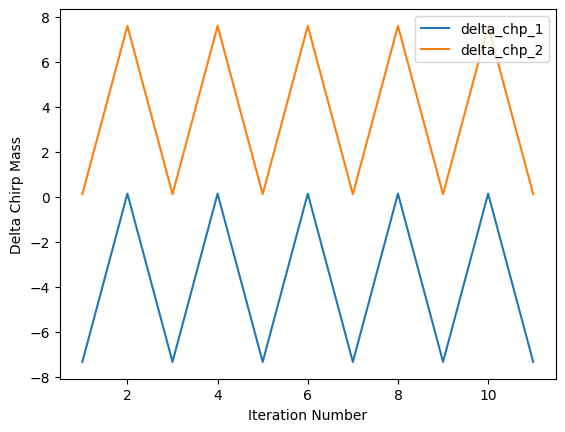

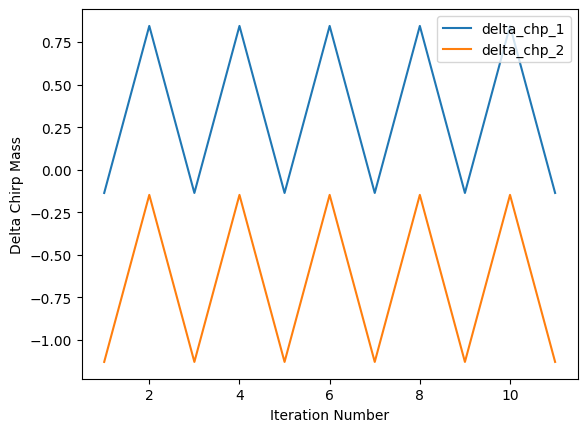

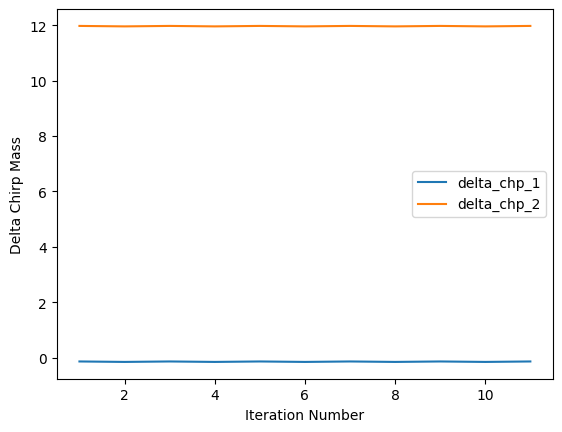

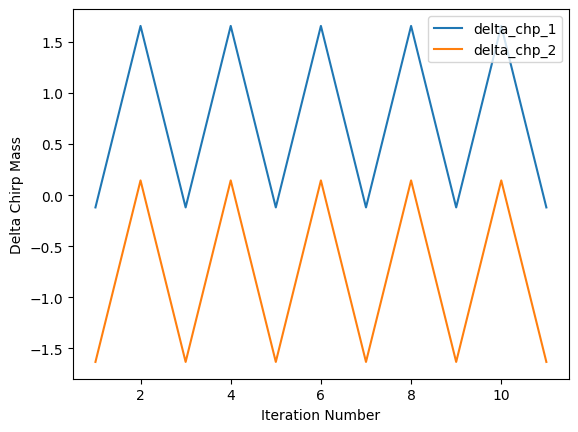

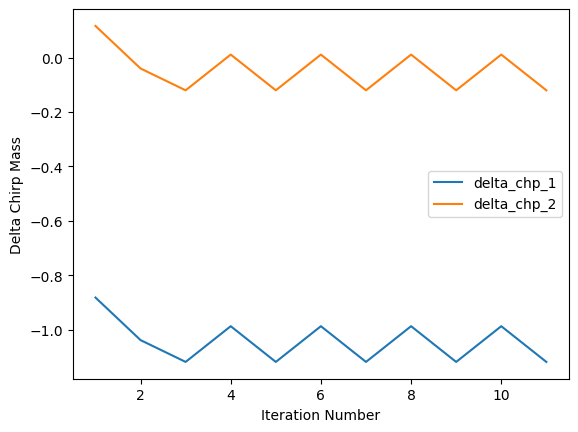

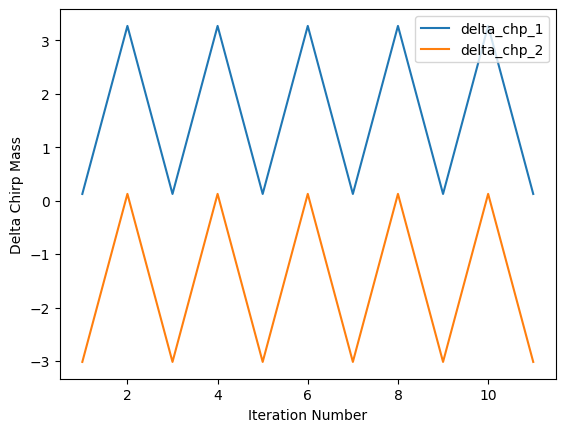

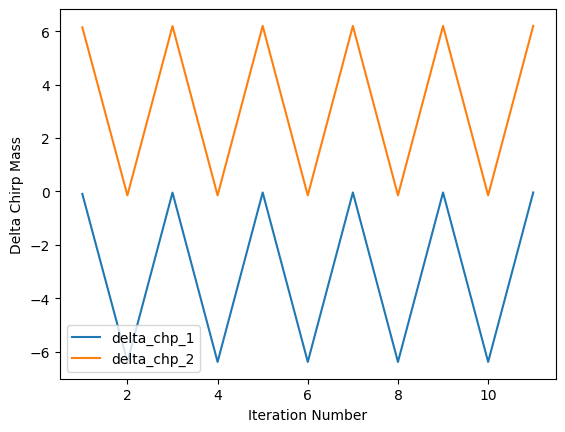

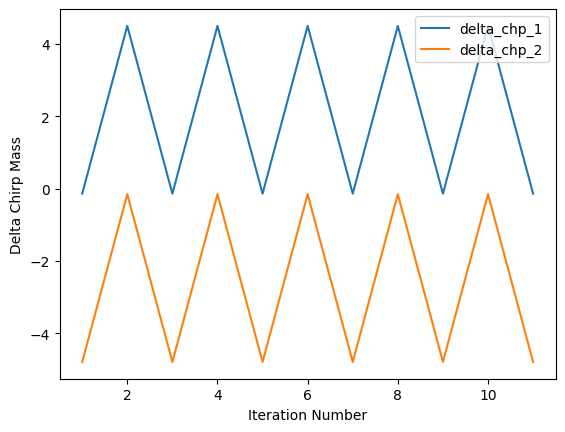

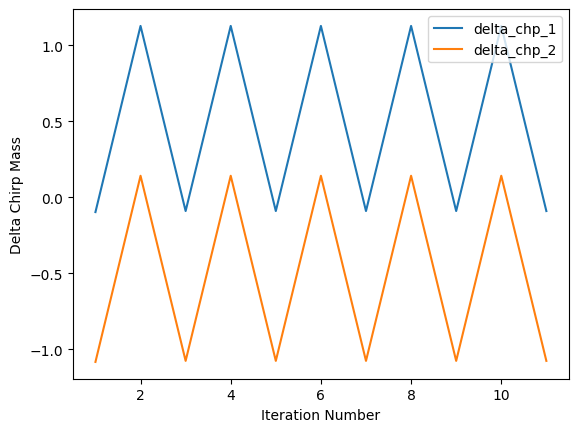

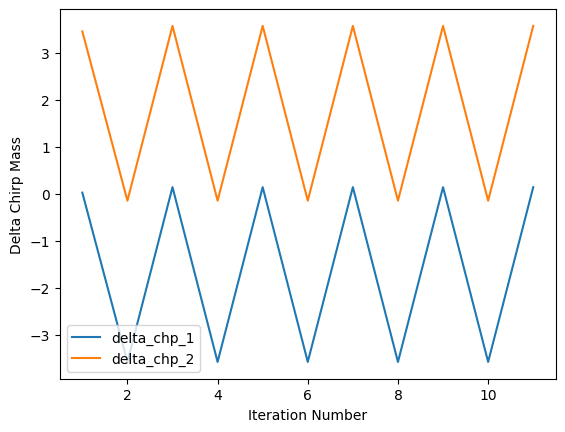

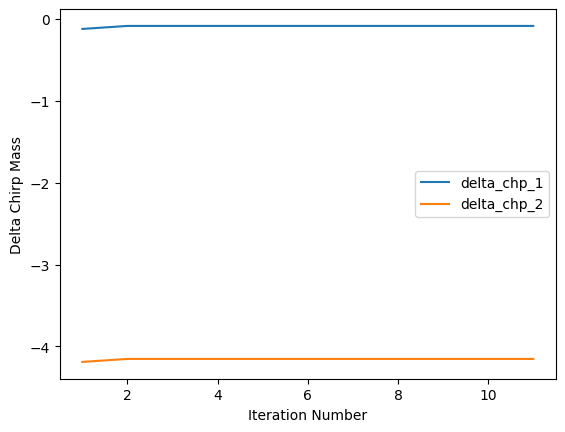

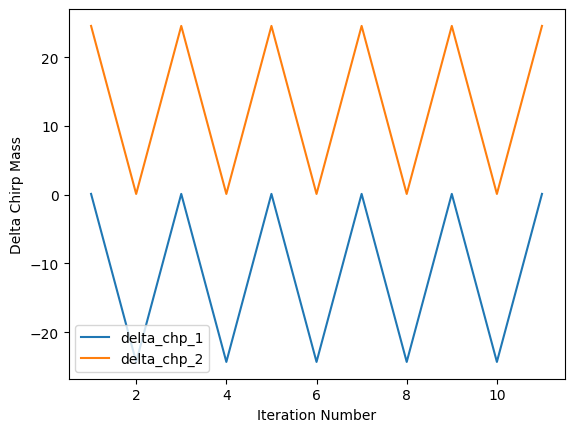

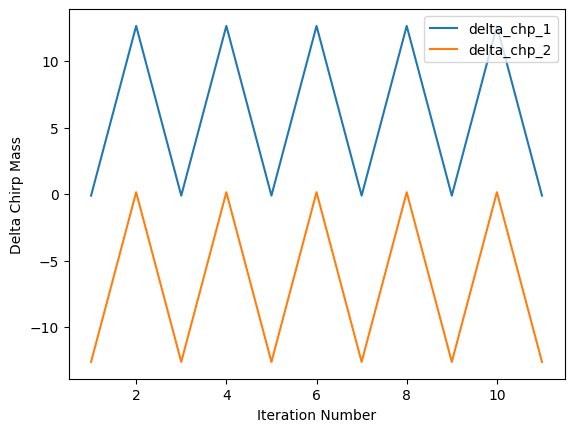

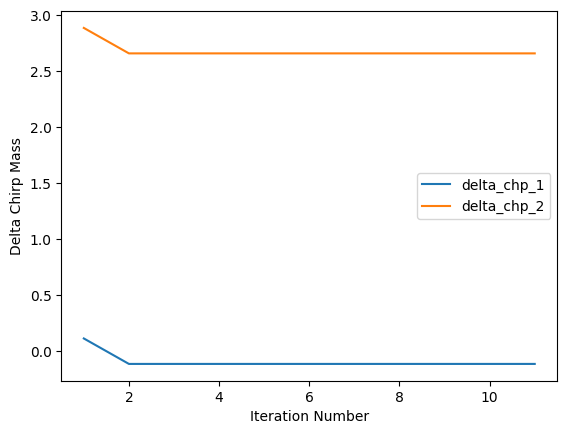

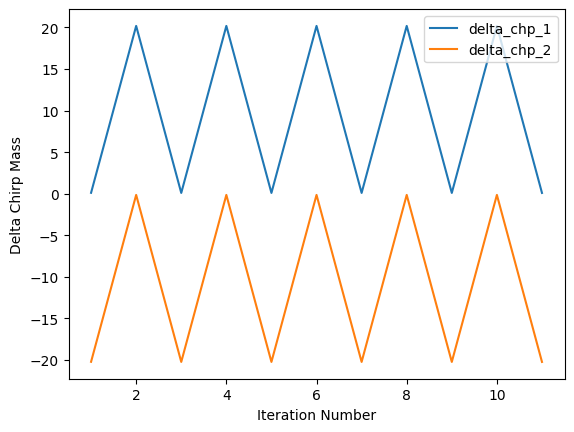

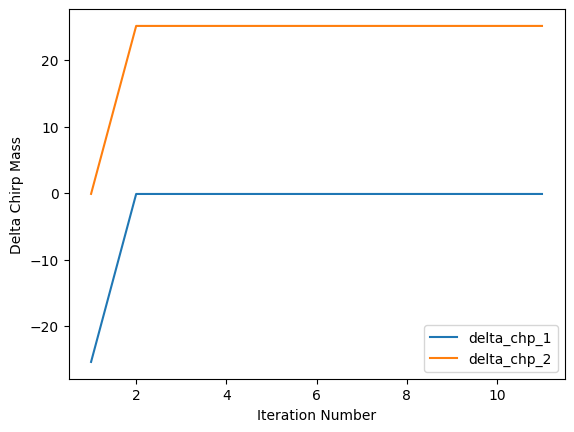

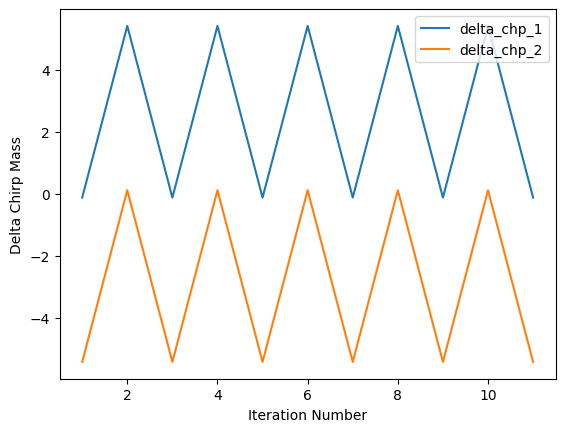

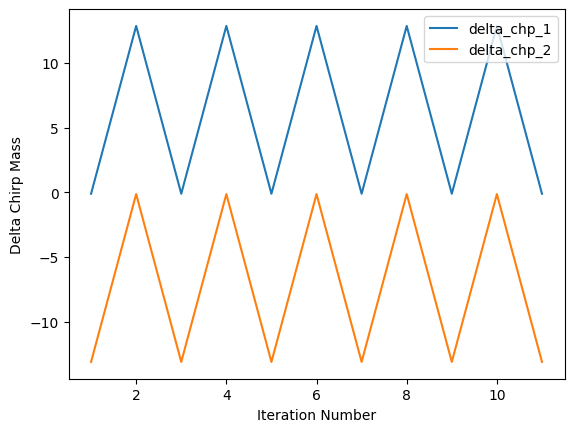

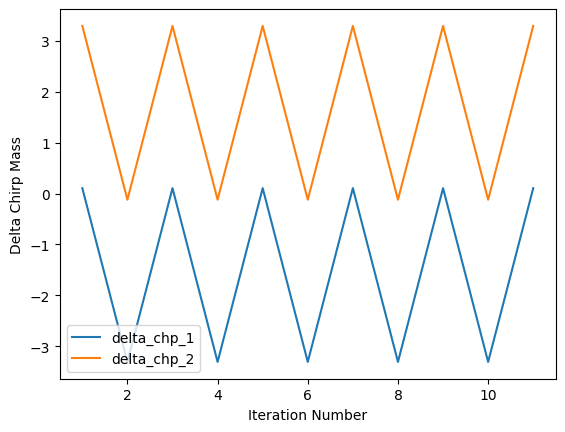

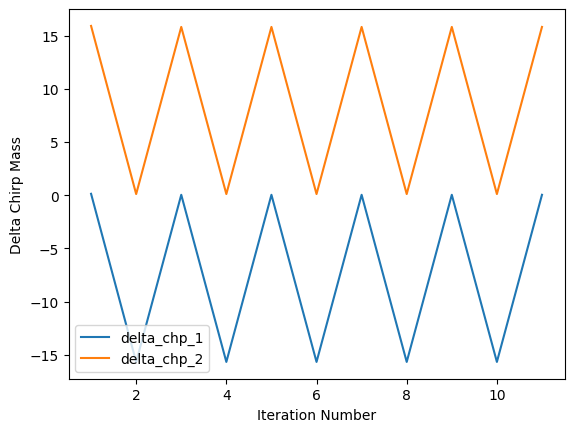

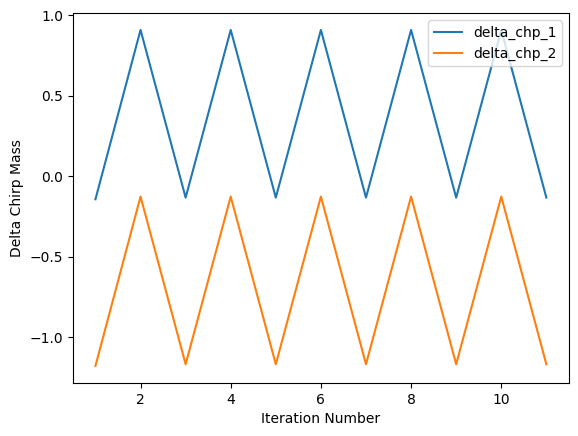

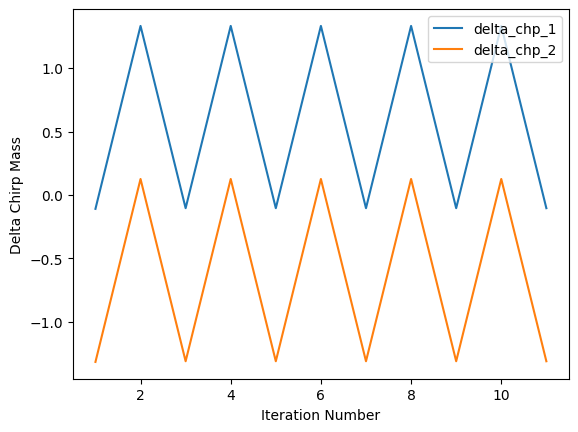

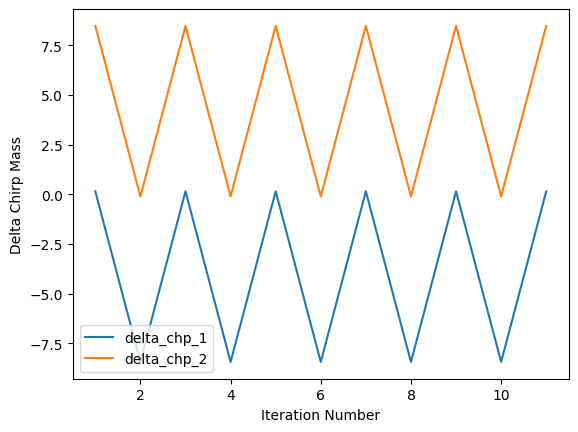

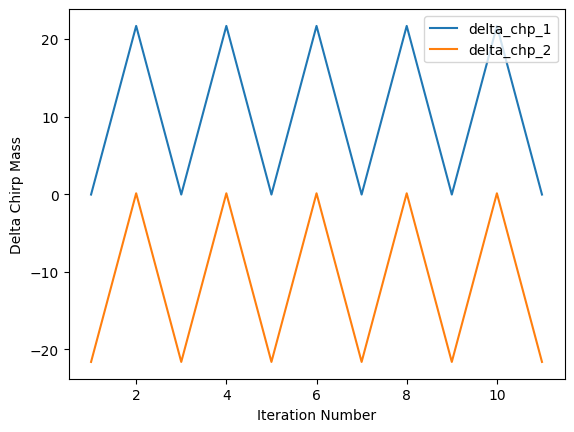

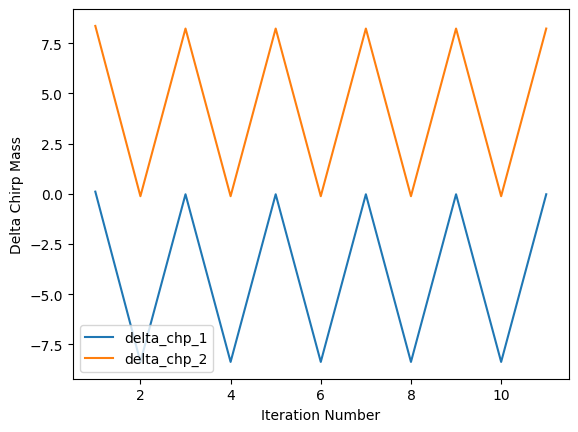

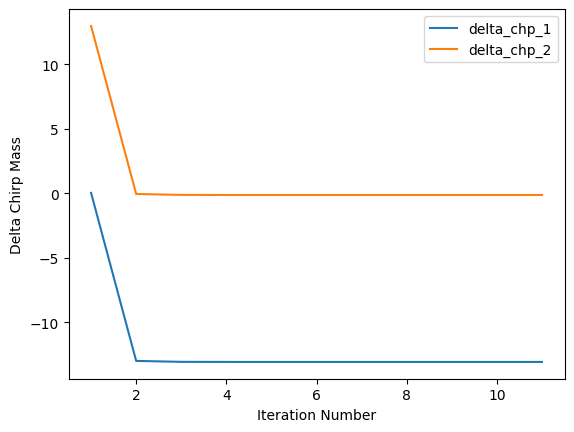

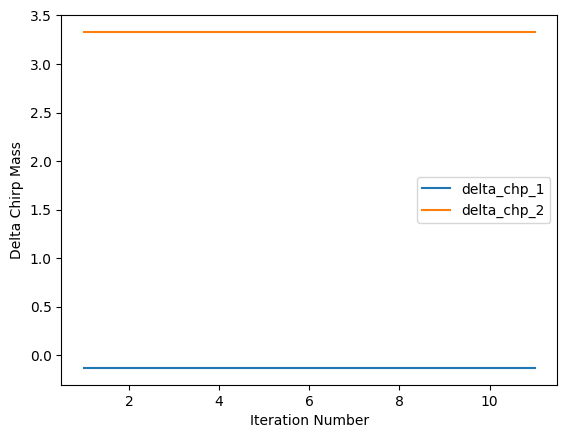

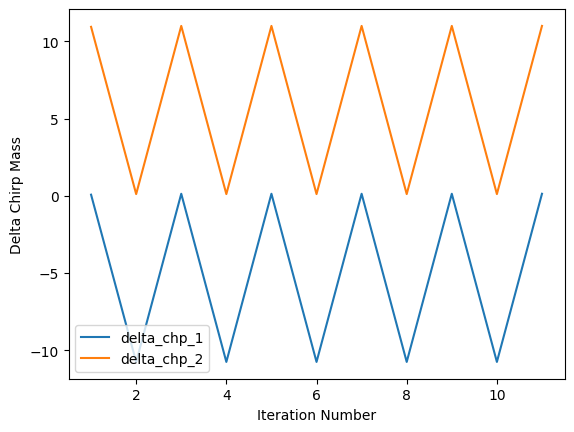

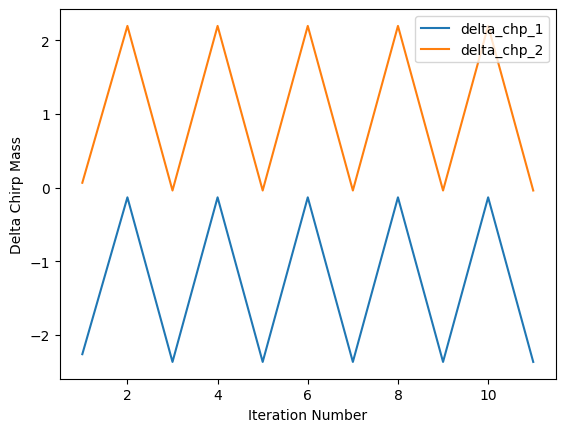

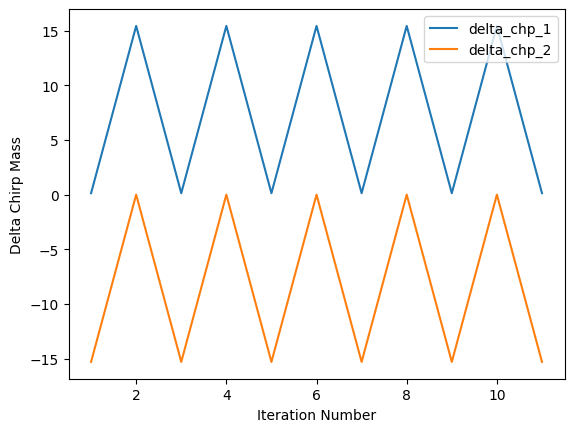

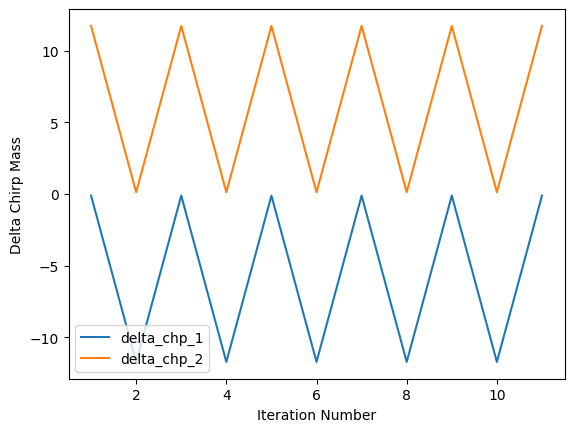

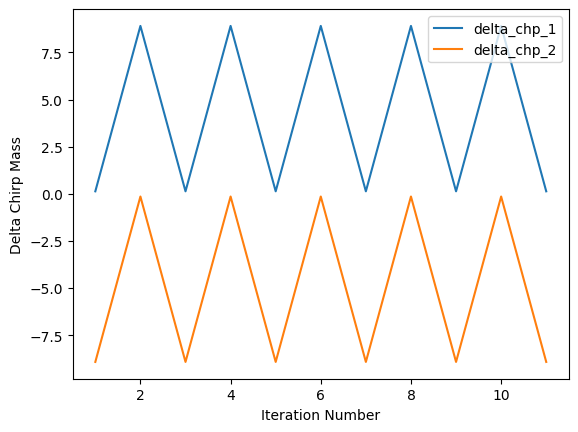

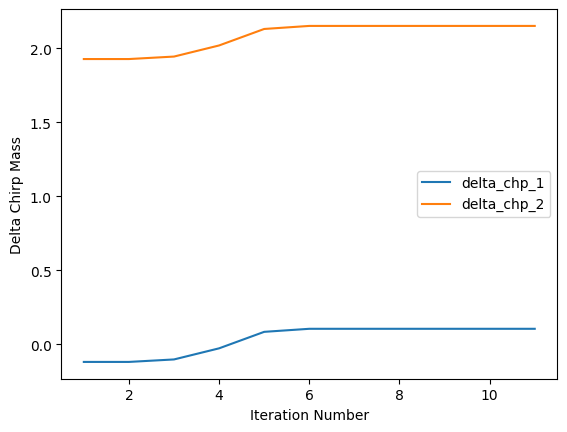

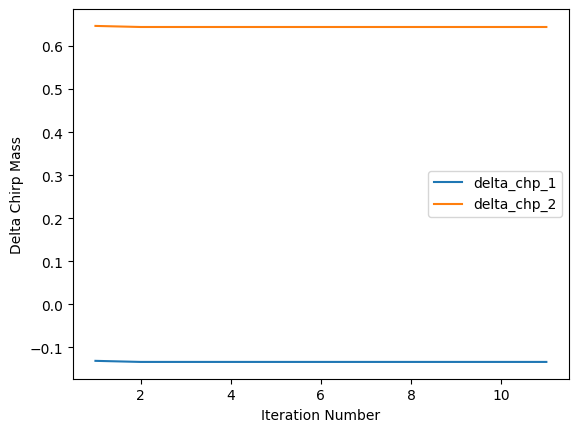

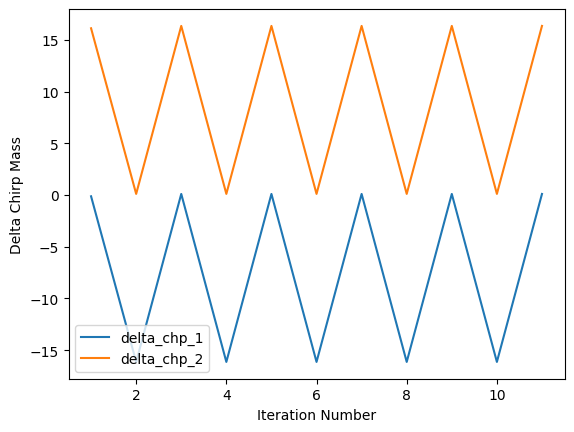

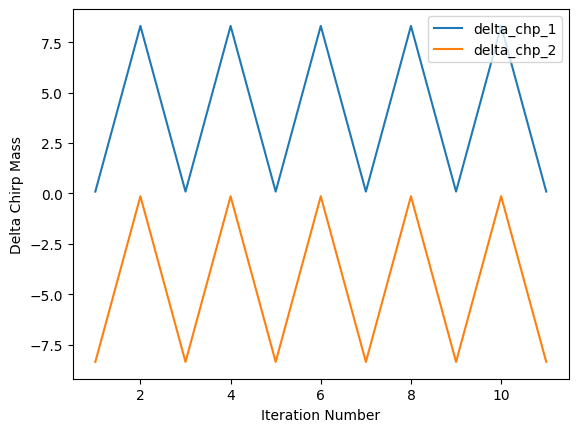

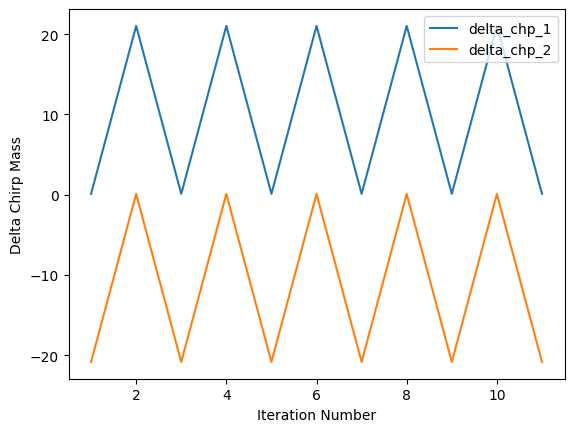

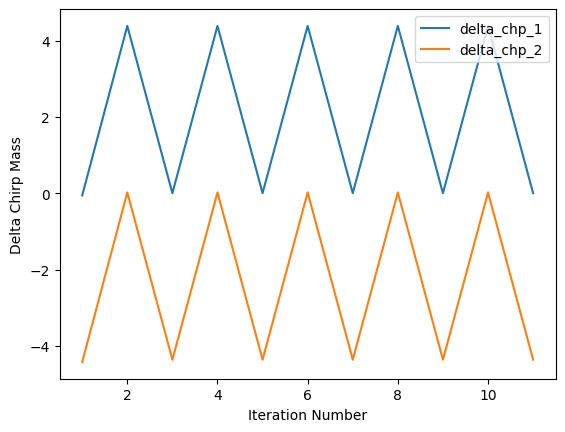

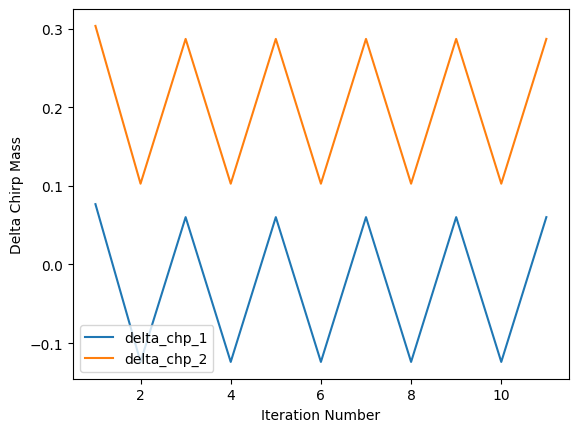

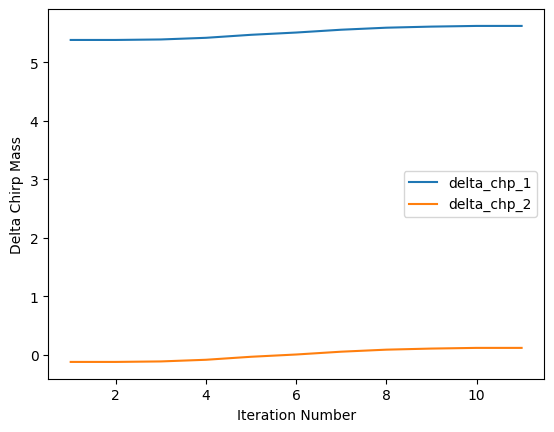

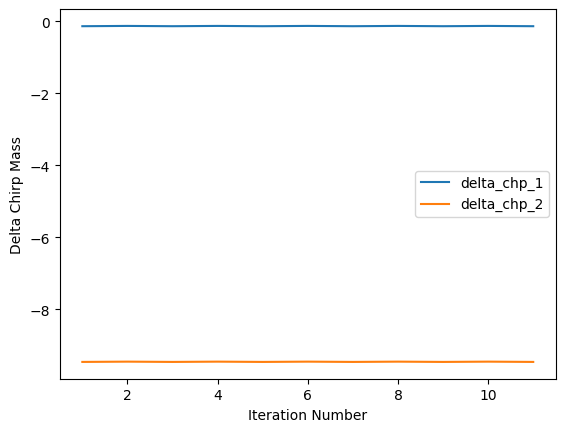

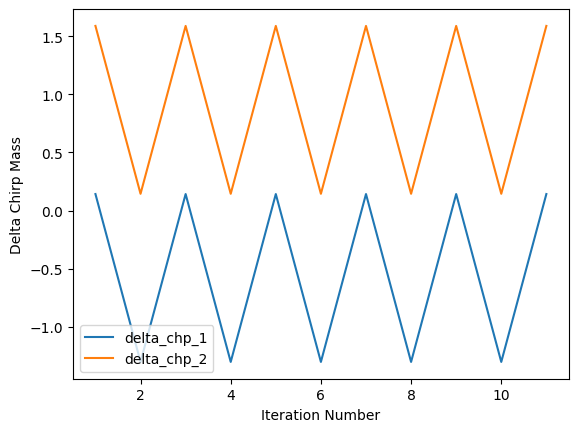

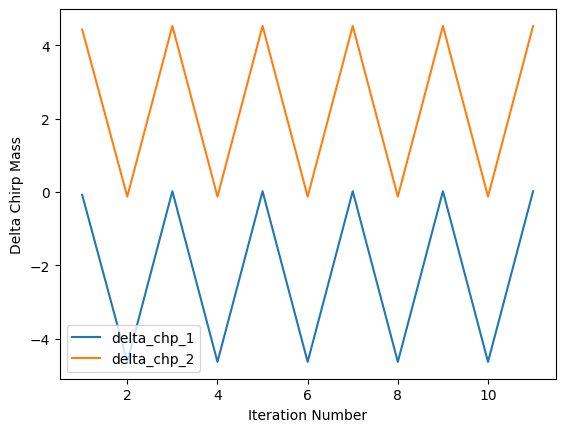

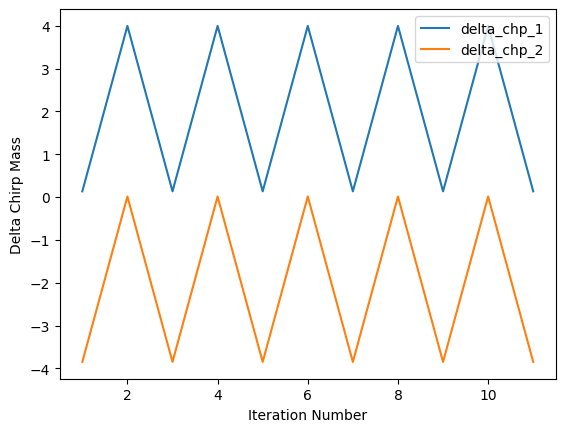

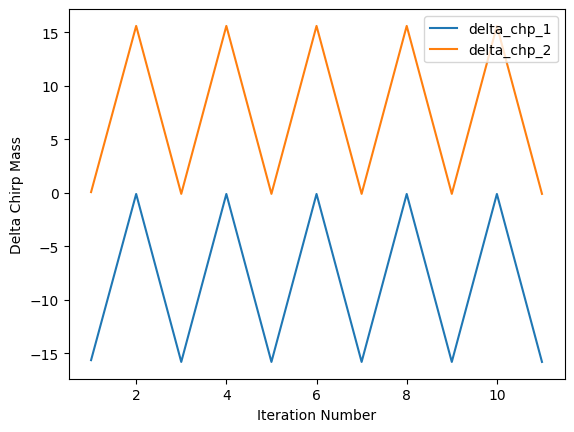

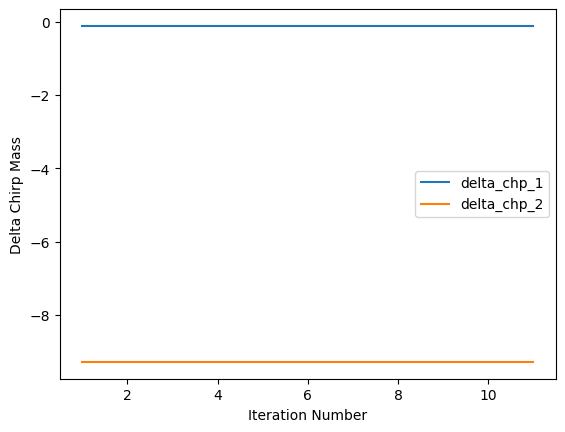

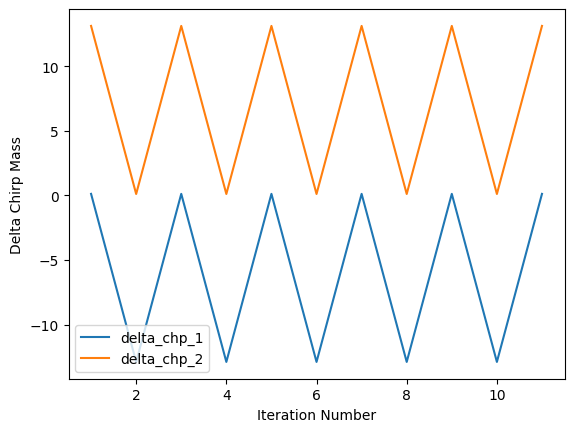

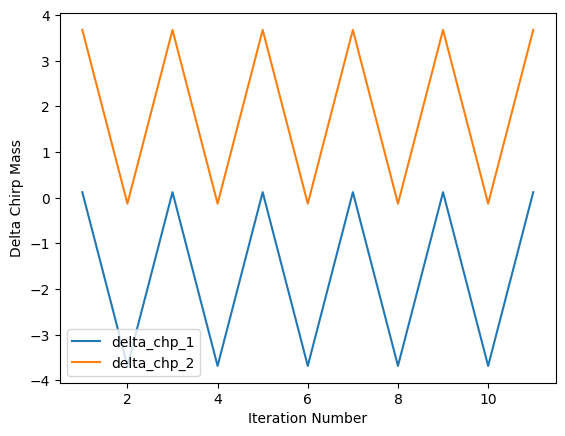

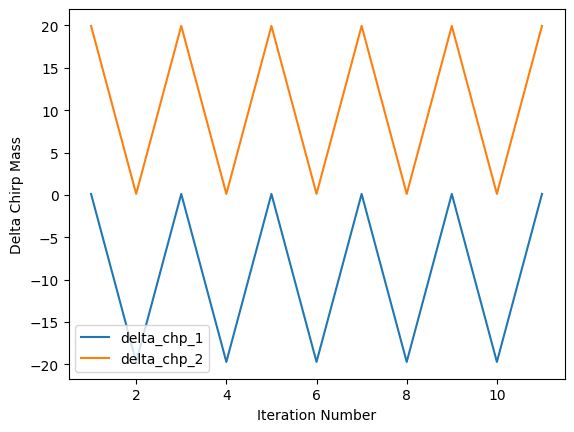

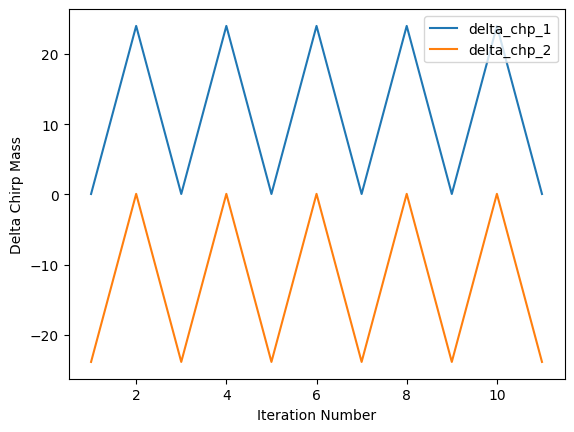

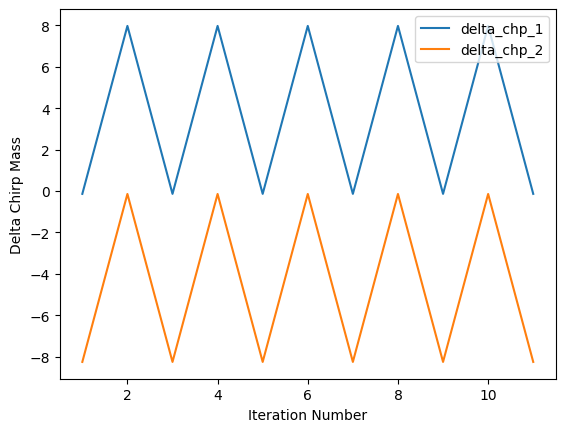

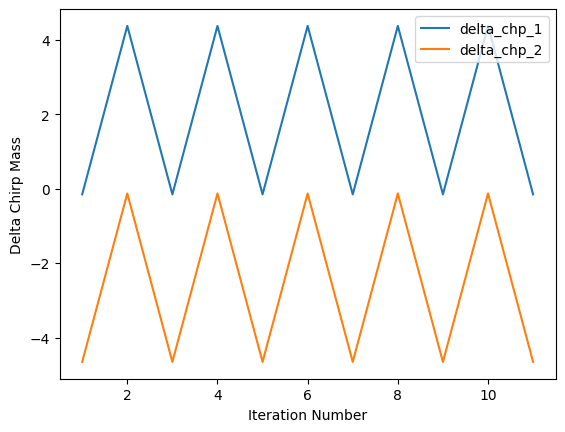

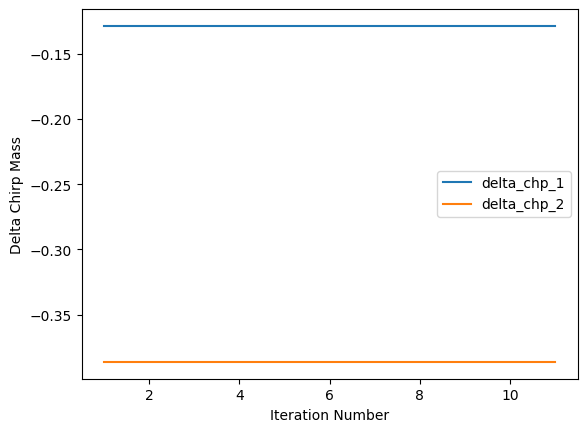

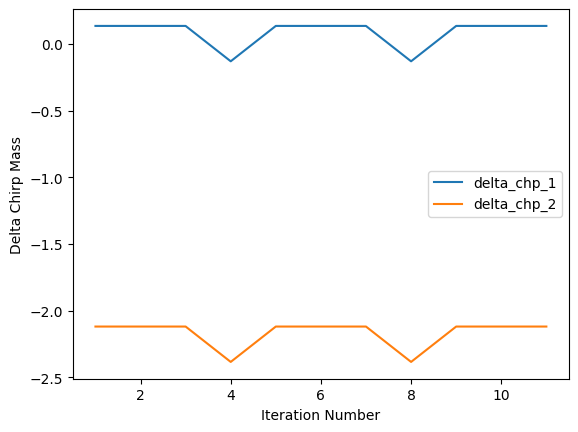

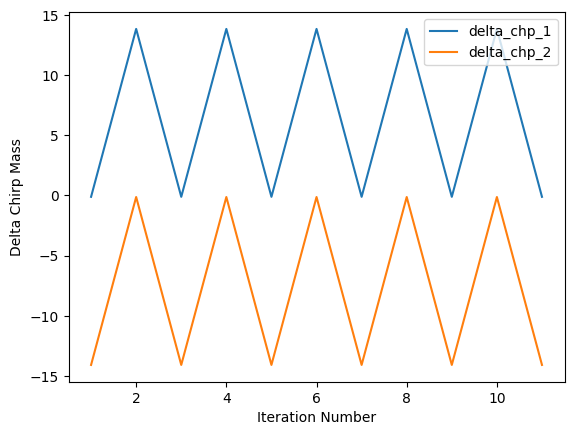

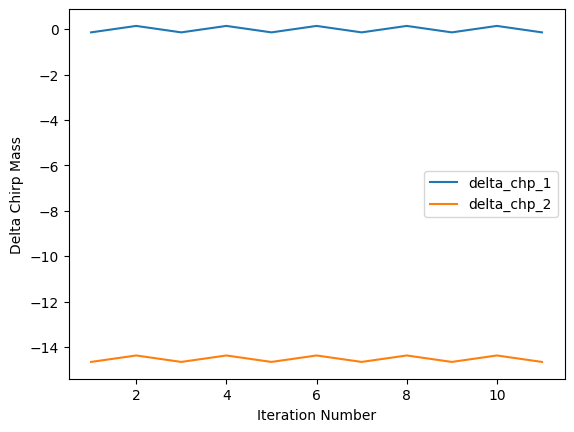

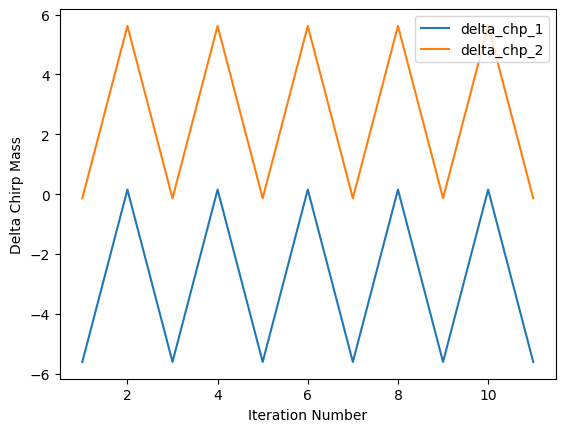

In [4]:
for i in range(200):
    data = pd.read_csv(f"Data_in_situ/sub_alg_{i}.csv")
    data = data.drop(["trig","index","snr_rec","snr1","snr2","time"],axis = 1)
    
    for j in range(11):
        data_1.loc[j,"m1_1"] = [float(num) for num in data.iloc[j,1].strip('()').split(',')][0]
        data_1.loc[j,"m2_1"] = [float(num) for num in data.iloc[j,1].strip('()').split(',')][1]
        data_1.loc[j,"m1_2"] = [float(num) for num in data.iloc[j,1].strip('()').split(',')][2]
        data_1.loc[j,"m2_2"] = [float(num) for num in data.iloc[j,1].strip('()').split(',')][3]
        data_1.loc[j,"m1_rec"] = [float(num) for num in data.iloc[j,2].strip('()').split(',')][0]
        data_1.loc[j,"m2_rec"] = [float(num) for num in data.iloc[j,2].strip('()').split(',')][1]
        
    data_1.loc[:,"chp_1"] = ((data_1.loc[:,"m1_1"] * data_1.loc[:,"m2_1"])**(3/5))/((data_1.loc[:,"m1_1"] + data_1.loc[:,"m2_1"])**(1/5))
    data_1.loc[:,"chp_2"] = ((data_1.loc[:,"m1_2"] * data_1.loc[:,"m2_2"])**(3/5))/((data_1.loc[:,"m1_2"] + data_1.loc[:,"m2_2"])**(1/5))
    data_1.loc[:,"chp_rec"] = ((data_1.loc[:,"m1_rec"] * data_1.loc[:,"m2_rec"])**(3/5))/((data_1.loc[:,"m1_rec"] + data_1.loc[:,"m2_rec"])**(1/5))
    data_1.loc[:,"delta_chp_1"] = data_1.loc[:,"chp_1"] - data_1.loc[:,"chp_rec"]
    data_1.loc[:,"delta_chp_2"] = data_1.loc[:,"chp_2"] - data_1.loc[:,"chp_rec"]

    plt.plot(list(range(1,12)),list(data_1.loc[:,"delta_chp_1"]))
    plt.plot(list(range(1,12)),list(data_1.loc[:,"delta_chp_2"]))
    plt.legend(["delta_chp_1","delta_chp_2"])
    plt.xlabel("Iteration Number")
    plt.ylabel("Delta Chirp Mass")
    plt.show()
